# Test Overlap between sources in a blend

In [1]:
# Import Packages and setup
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import proximal, display, sim, baseline
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)
plogger = logging.getLogger("proxmin")
plogger.setLevel(logging.INFO)

In [3]:
# Load the data
dataPath = os.path.abspath(os.path.join(lsst.utils.getPackageDir("testdata_deblender"), 'sim_data'))
filters = ["u", "g", "r", "i", "z", 'y']
imgFilename = os.path.join(dataPath, "test4/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test4/det_merge.fits")
simFilename = os.path.join(dataPath, "test4/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename, useExactPeaks=True)

INFO:lsst.meas.deblender.proximal:Total parents: 8
INFO:lsst.meas.deblender.proximal:Unblended sources: 5
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 3


INFO:lsst.meas.deblender.proximal:Average Noise:
[0.7000000068119594, 0.7000000068119594, 0.7000000068119594, 0.7000000068119594, 0.7000000068119594, 0.7000000068119594]
INFO:lsst.meas.deblender.proximal:Parent id: 1
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.59 s


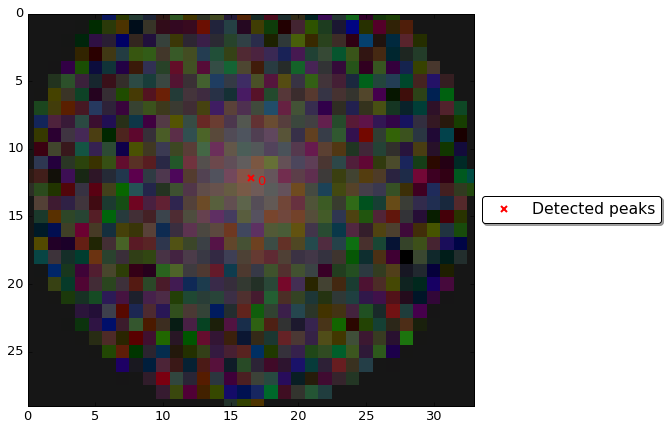

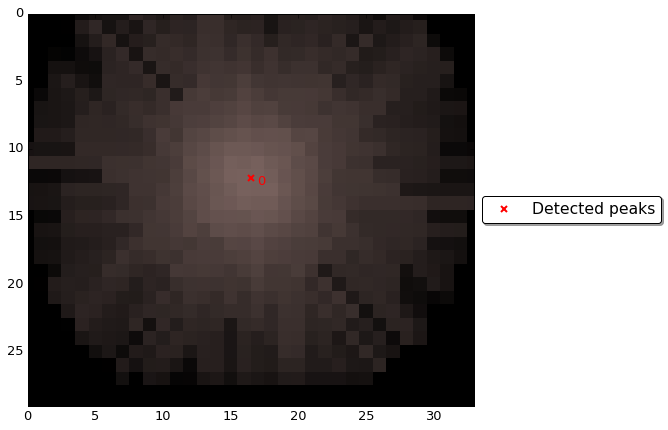

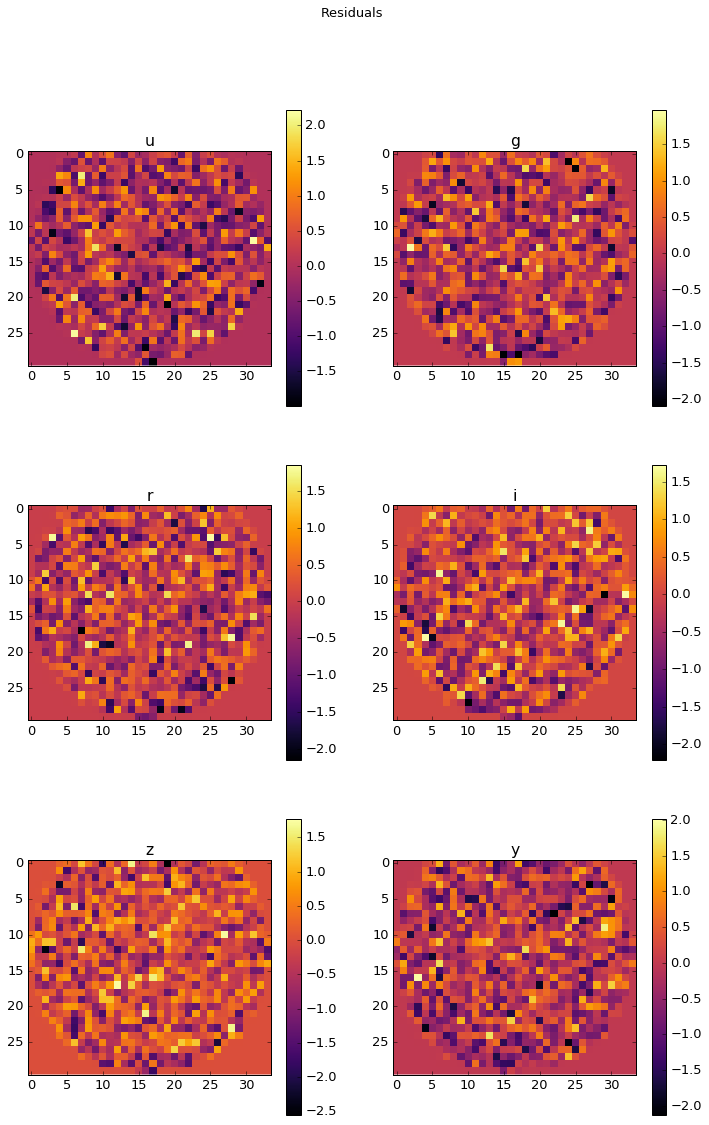

INFO:lsst.meas.deblender.proximal:Peak 0


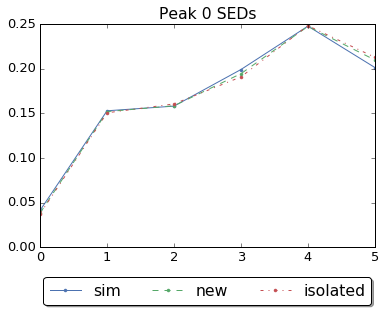

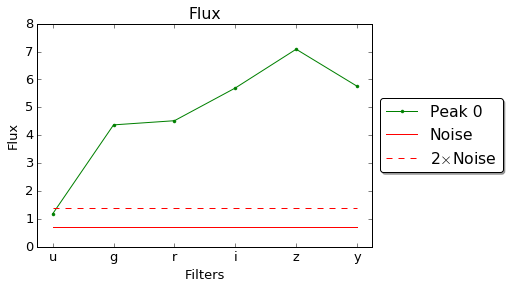

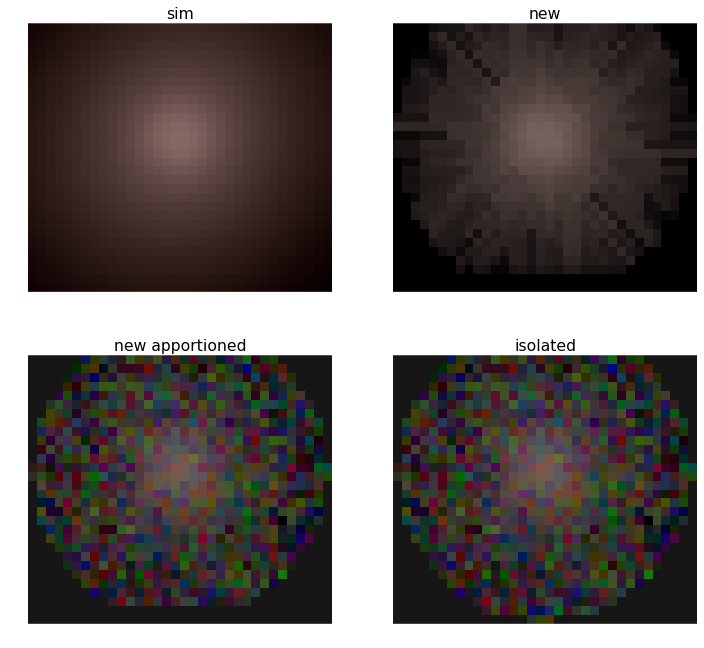

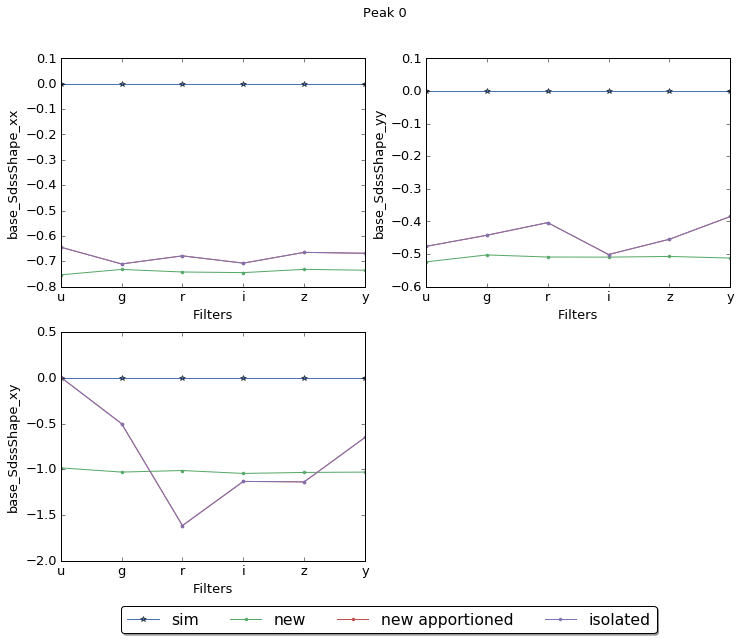

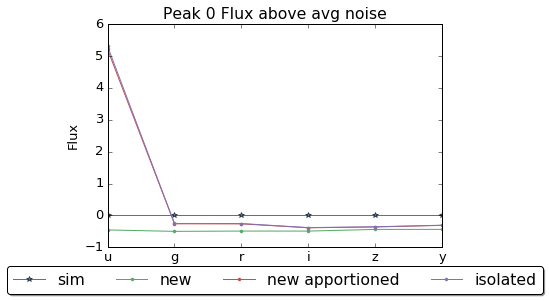

INFO:lsst.meas.deblender.proximal:Parent id: 2
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.62 s


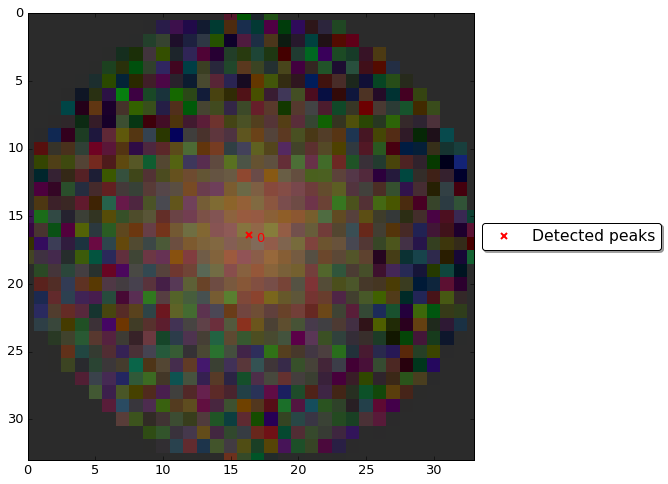

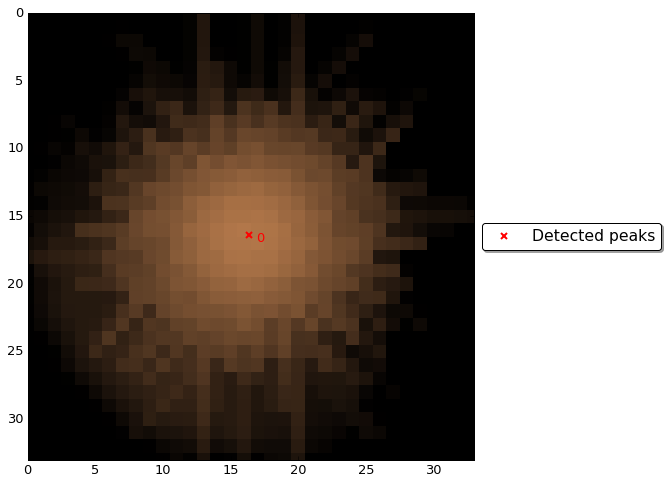

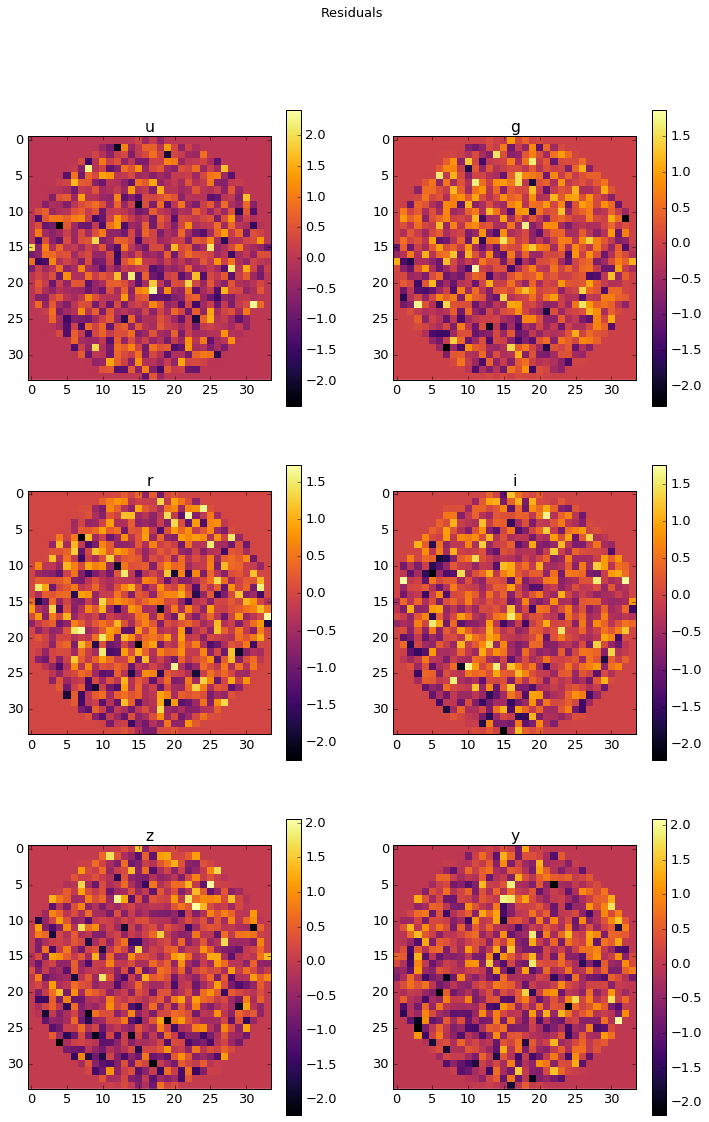

INFO:lsst.meas.deblender.proximal:Peak 0


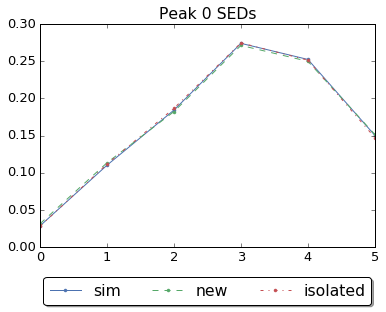

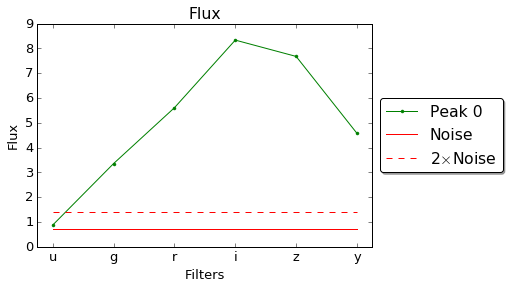

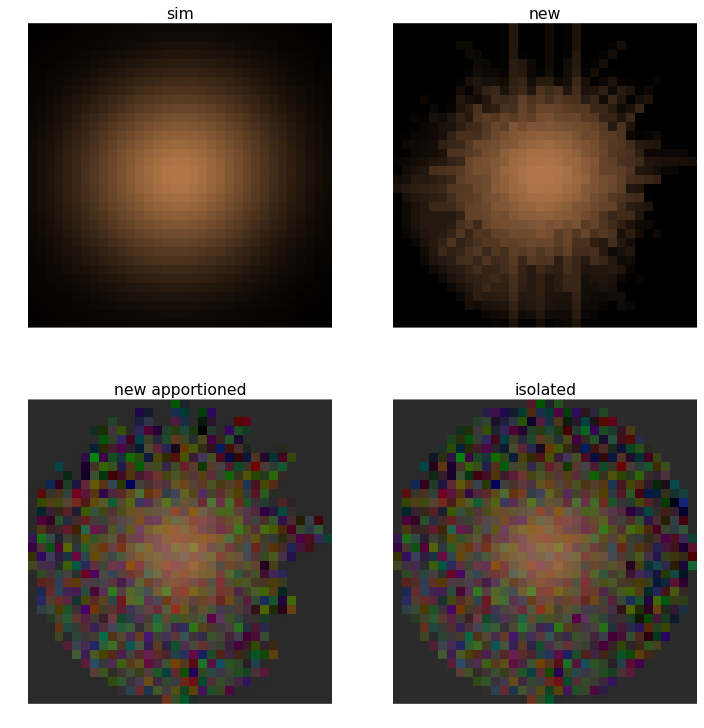

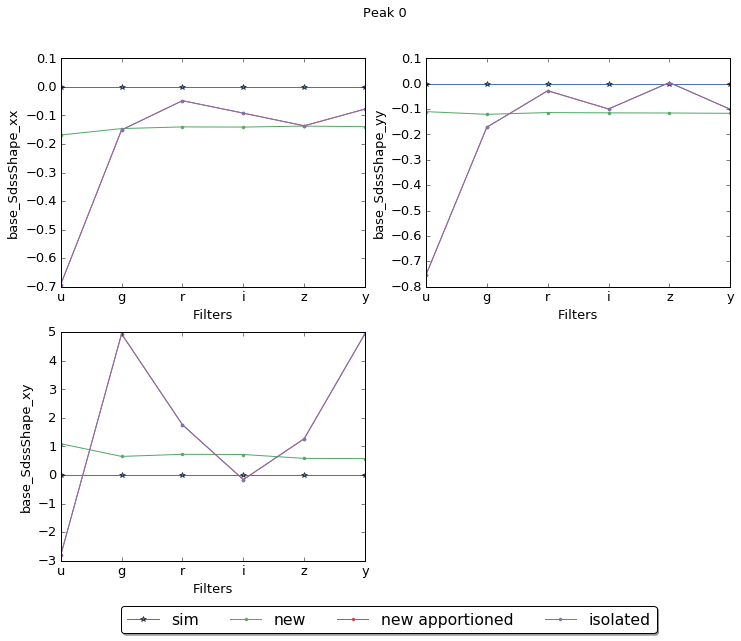

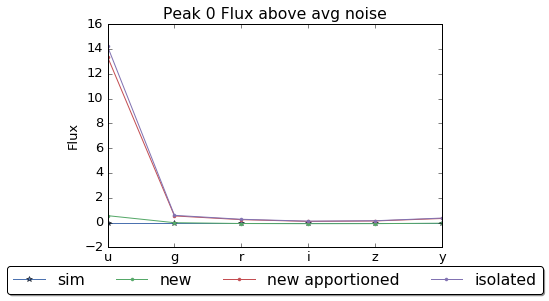

INFO:lsst.meas.deblender.proximal:Parent id: 5
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.53 s


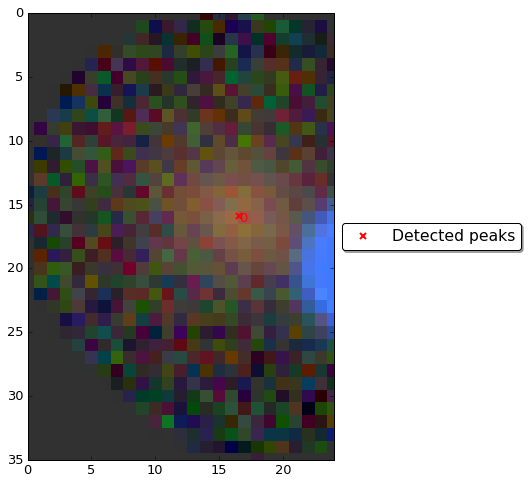

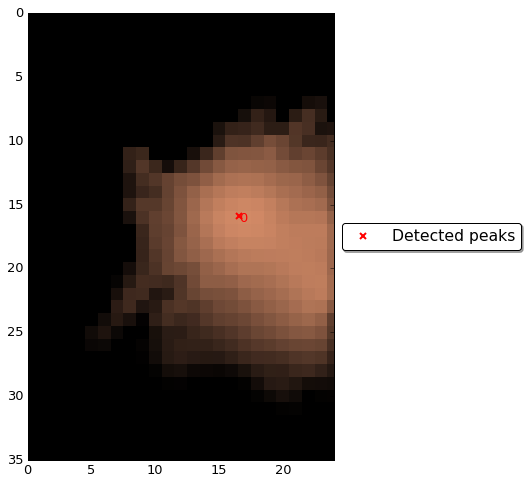

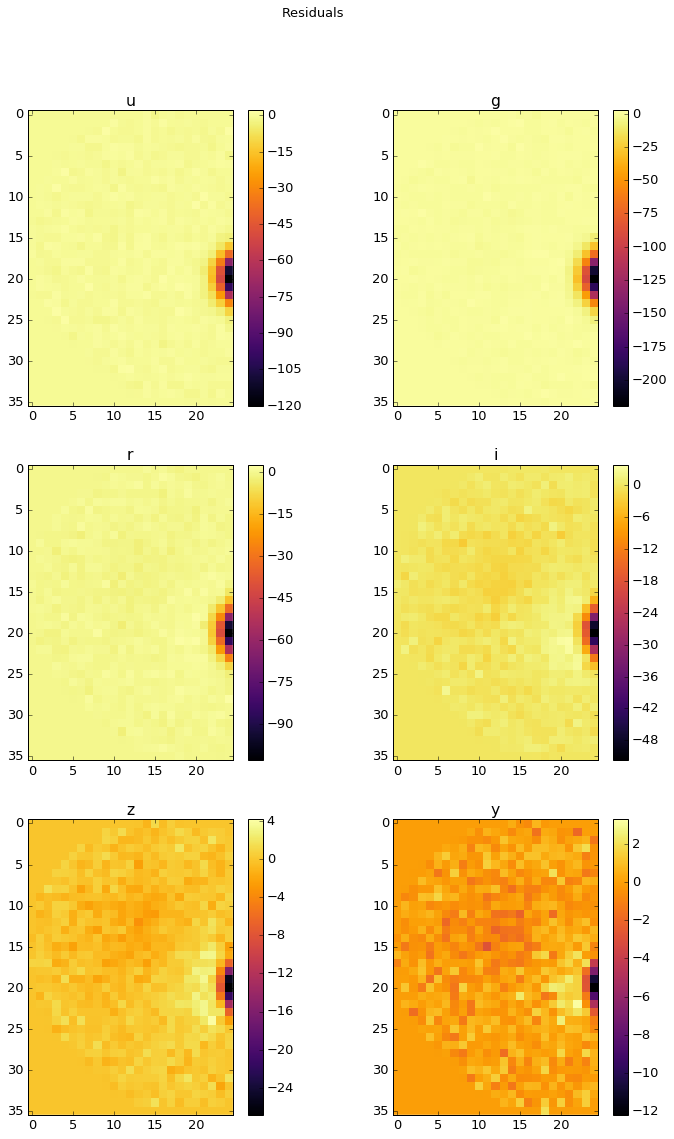

INFO:lsst.meas.deblender.proximal:Peak 0


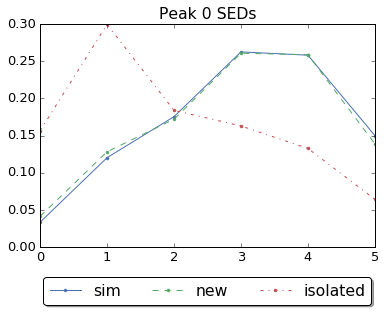

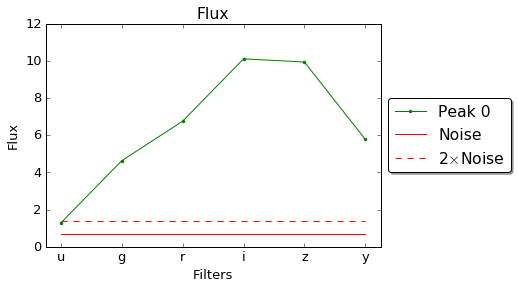

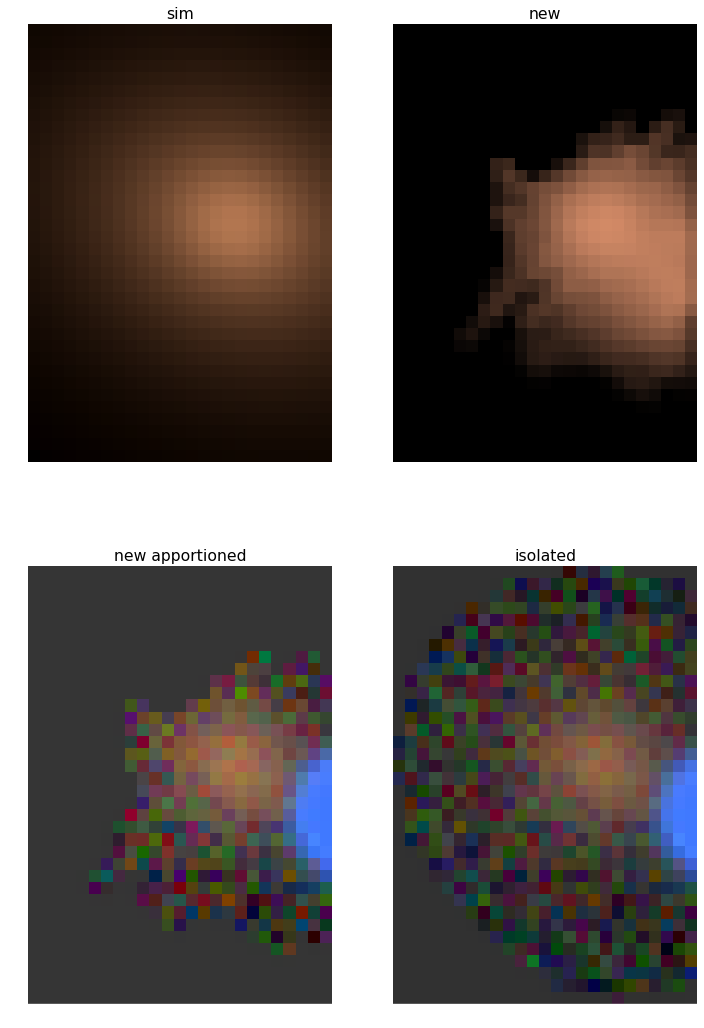

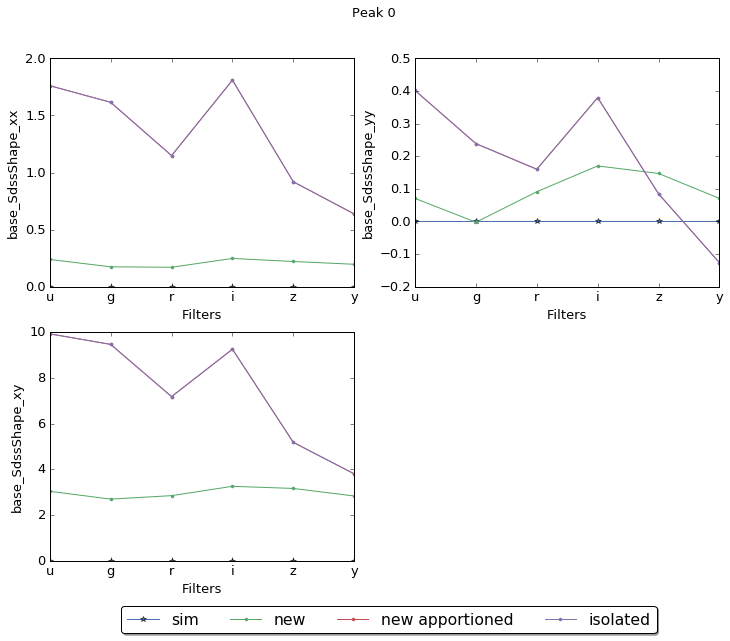

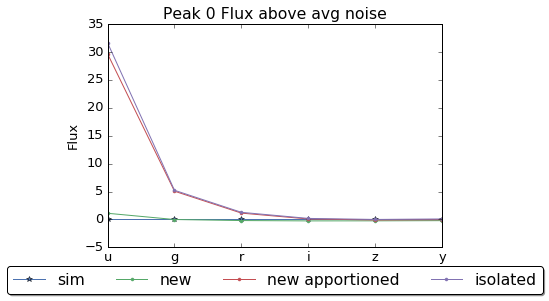

INFO:lsst.meas.deblender.proximal:Parent id: 6
/Users/fred/projects/proxmin/proxmin/proximal.py:60: RuntimeWarning: invalid value encountered in true_divide
  return X / np.sum(X, axis=axis, keepdims=True)
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 26.03 s


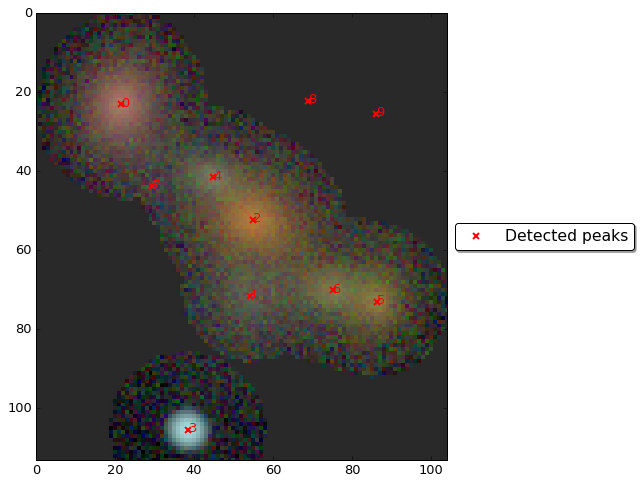

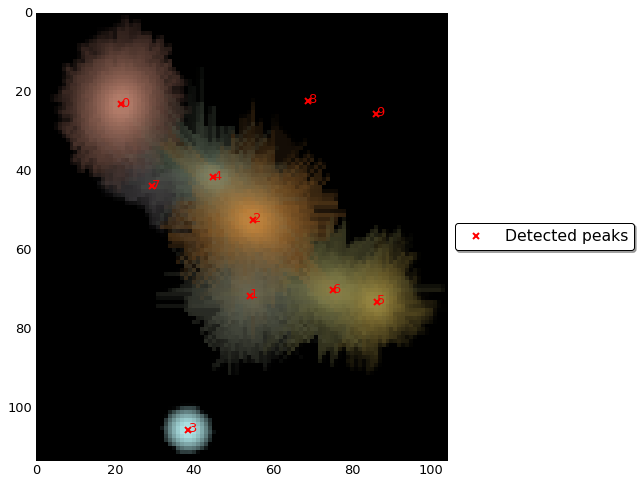

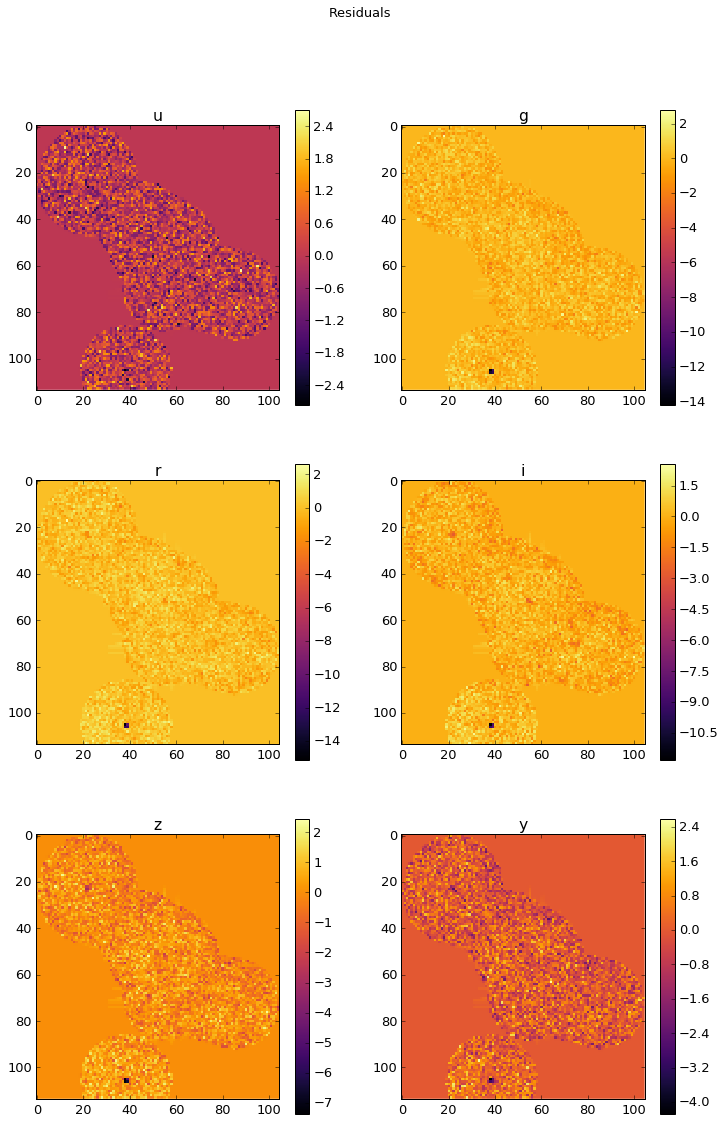

/Users/fred/lsst/code/meas_deblender/python/lsst/meas/deblender/proximal.py:810: RuntimeWarning: invalid value encountered in true_divide
  oldSeds = oldSeds/norm
/Users/fred/lsst/code/lsstsw3/miniconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


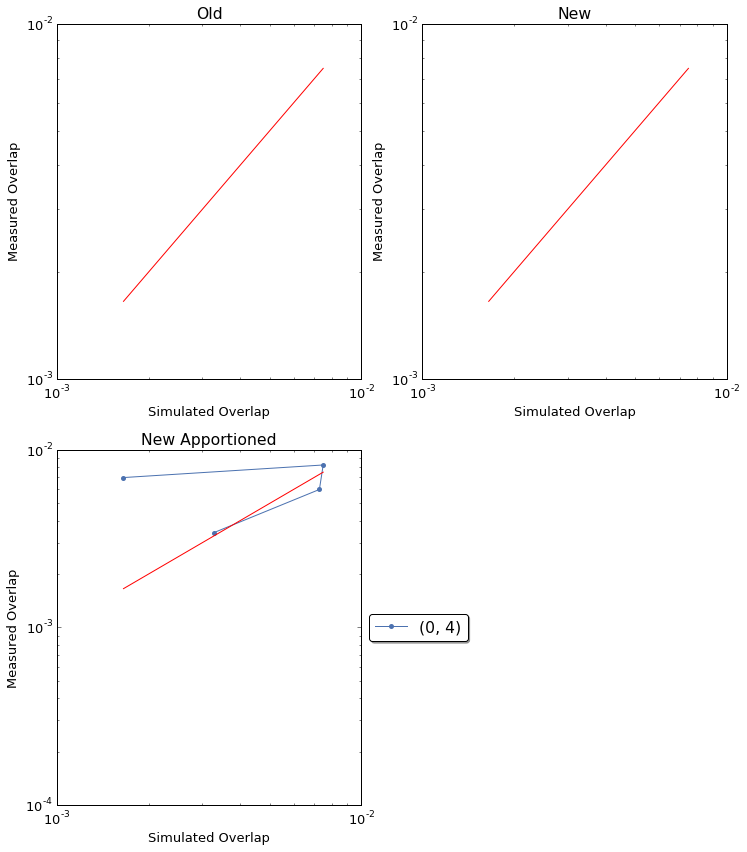

INFO:lsst.meas.deblender.proximal:Peak 0


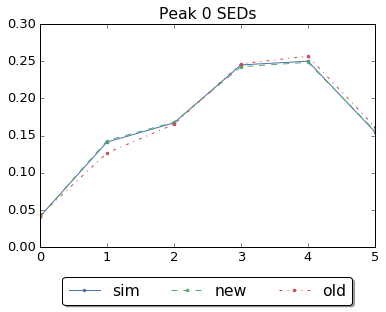

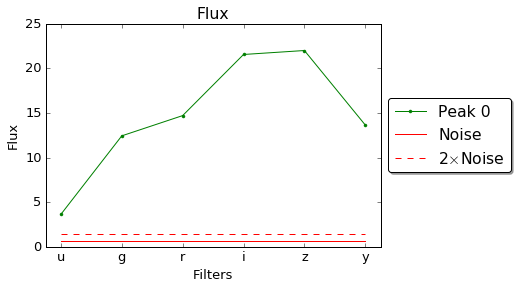

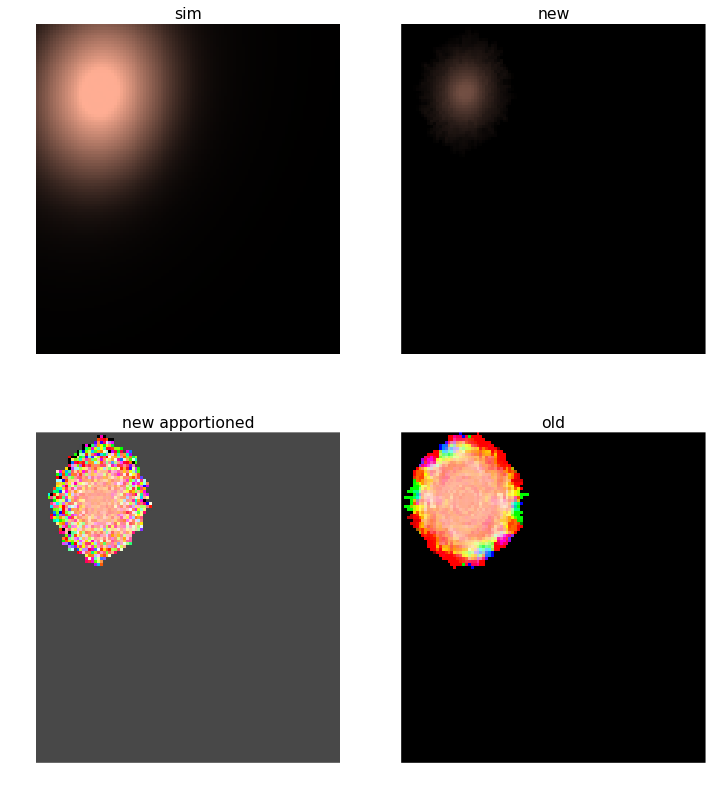

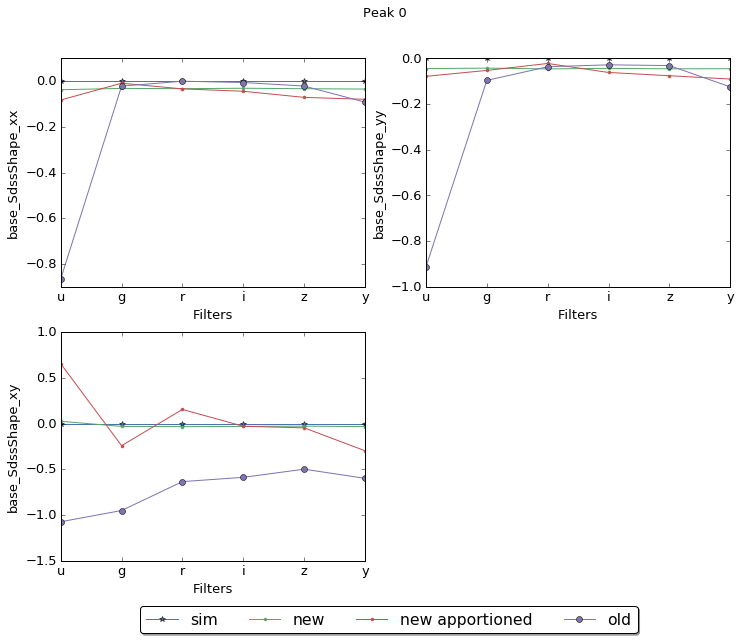

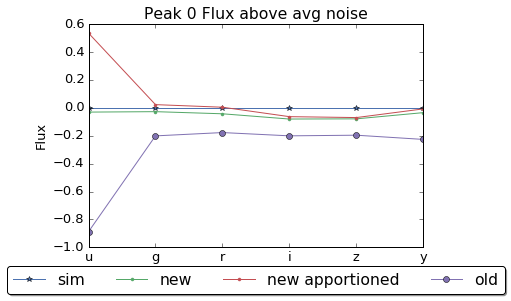

INFO:lsst.meas.deblender.proximal:Peak 1


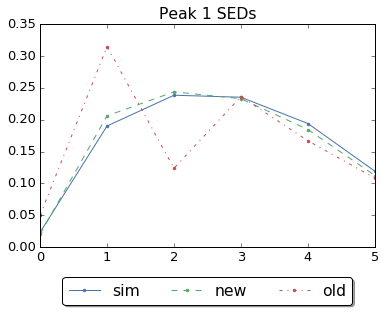

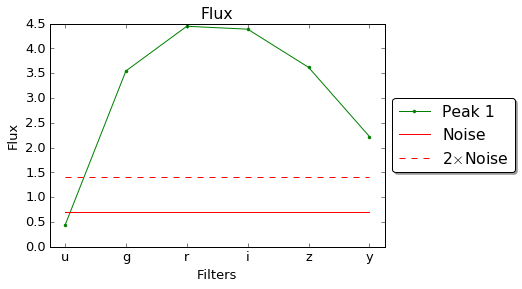

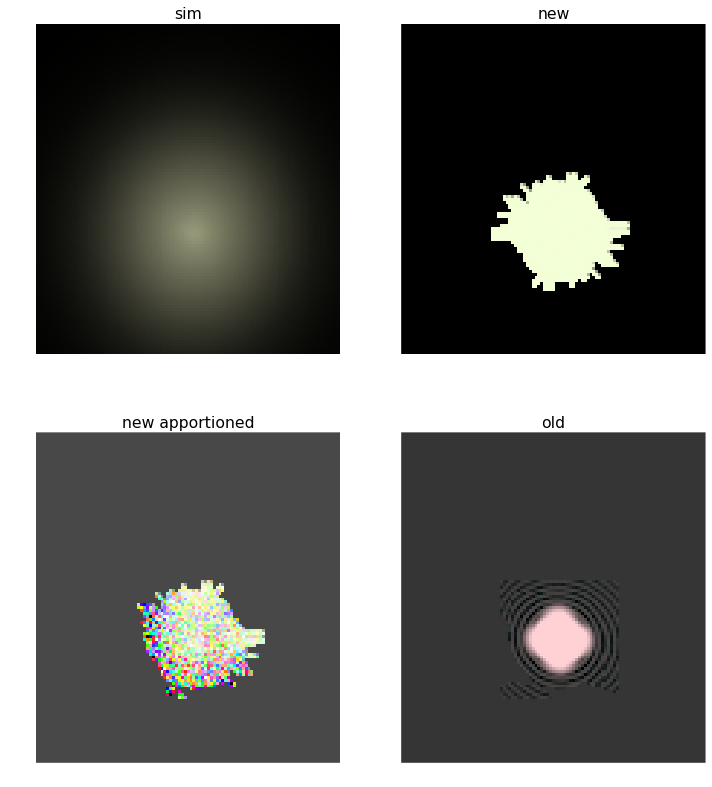

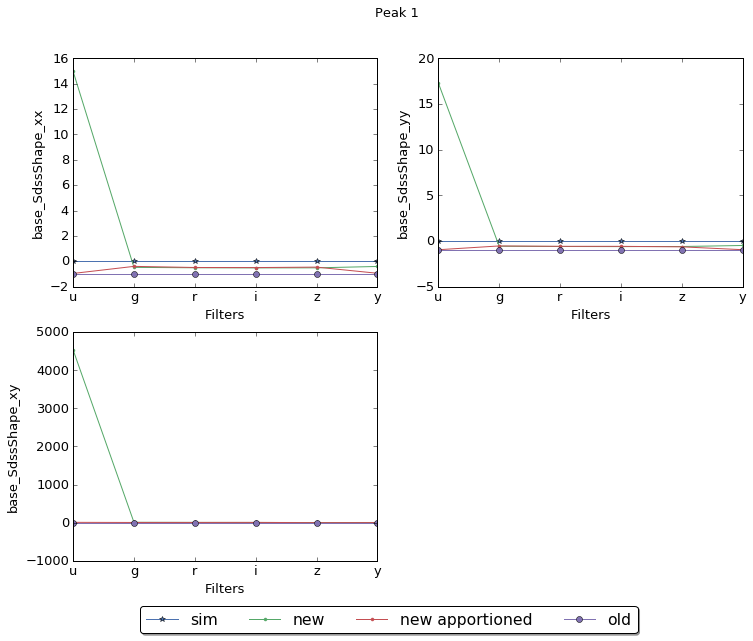

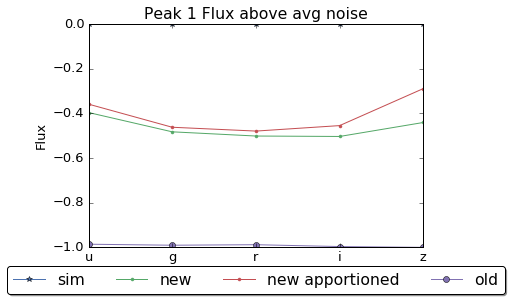

INFO:lsst.meas.deblender.proximal:Peak 2


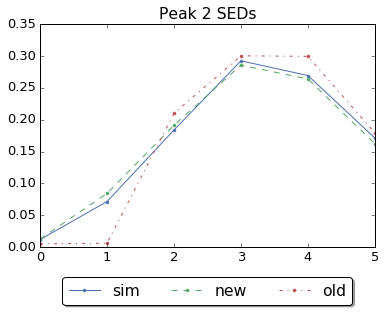

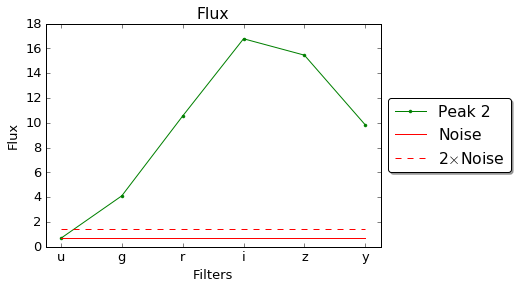

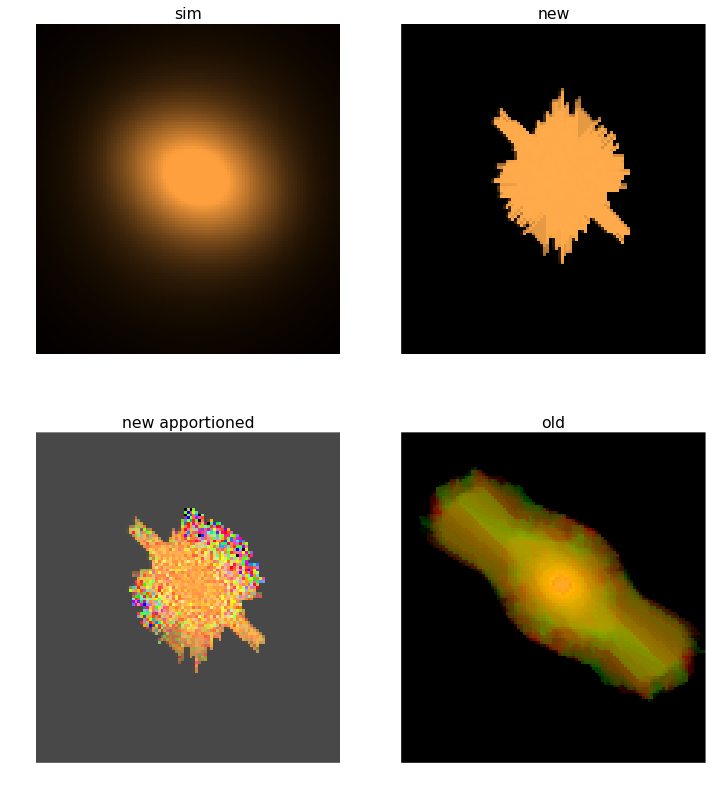

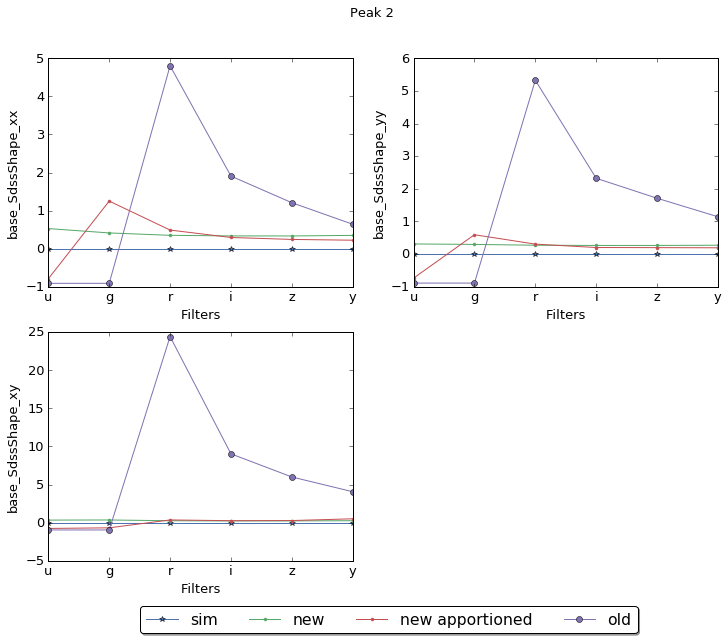

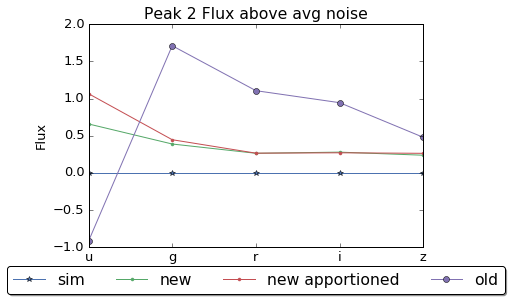

INFO:lsst.meas.deblender.proximal:Peak 3


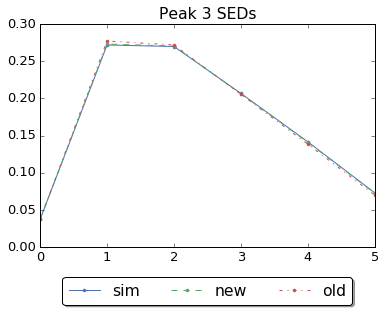

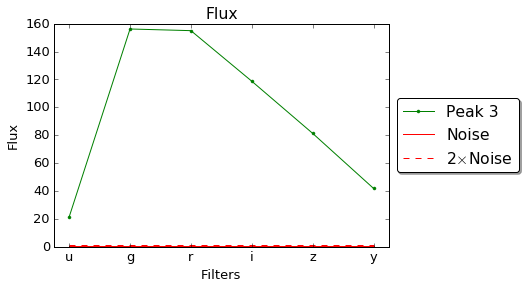

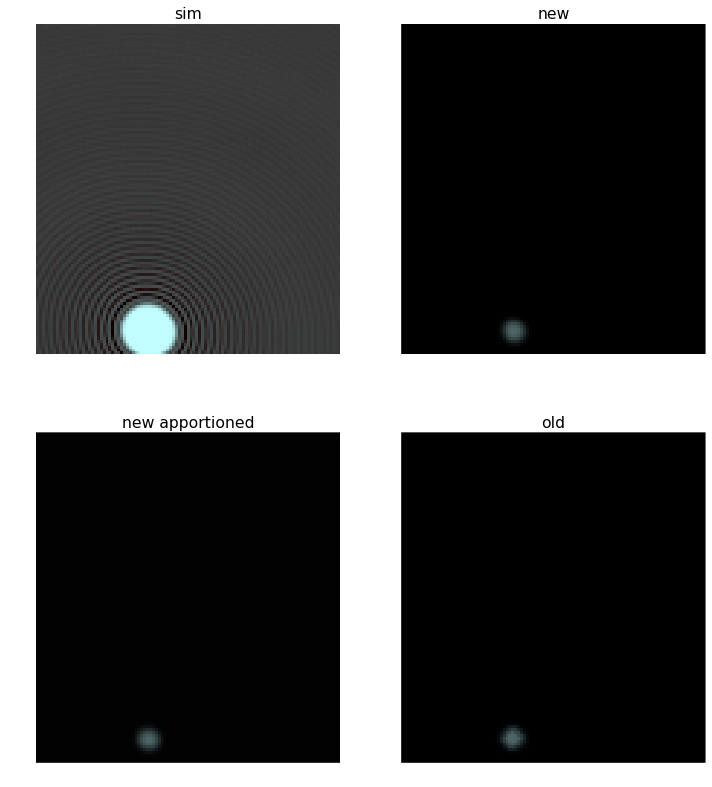

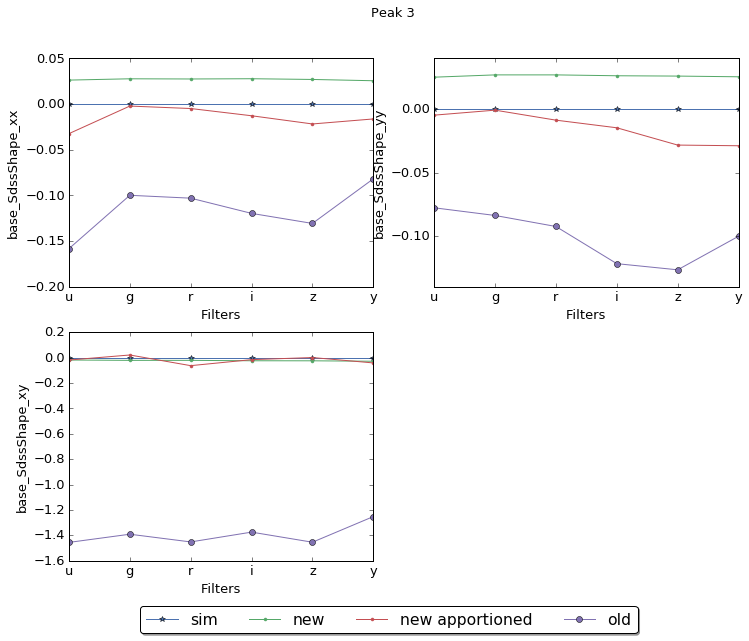

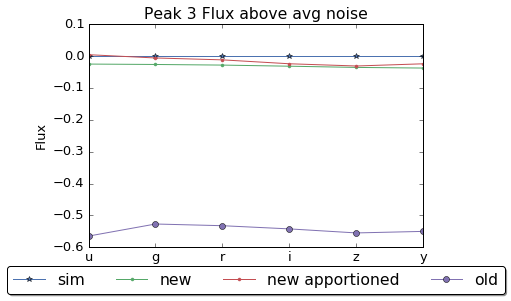

INFO:lsst.meas.deblender.proximal:Peak 4


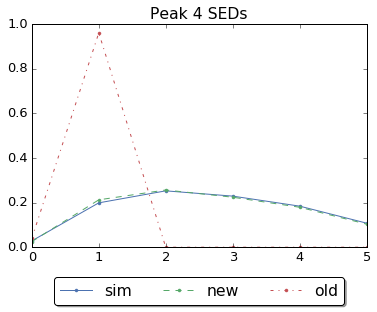

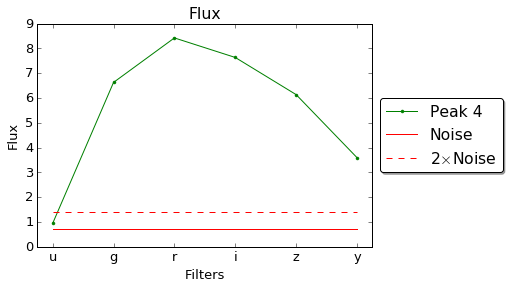

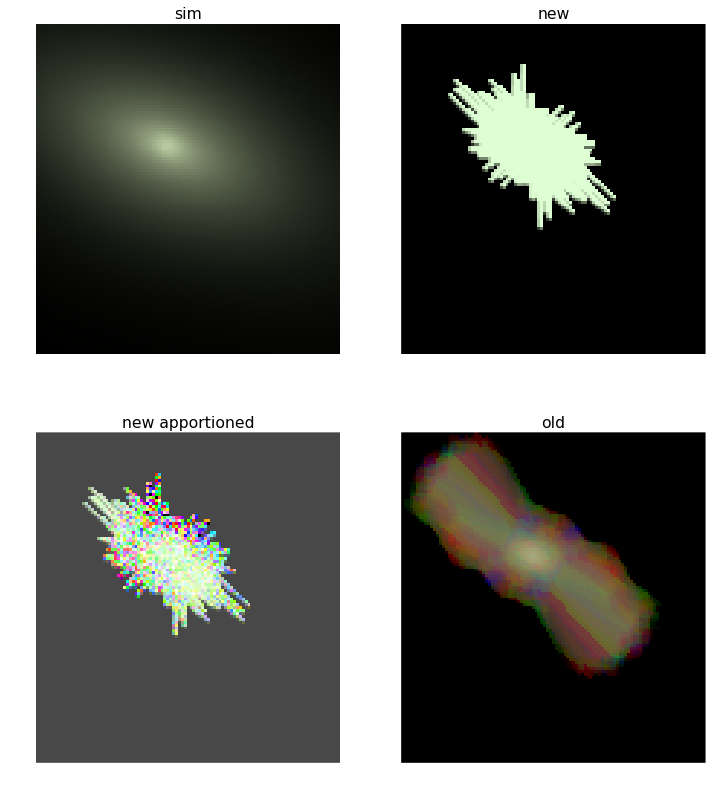

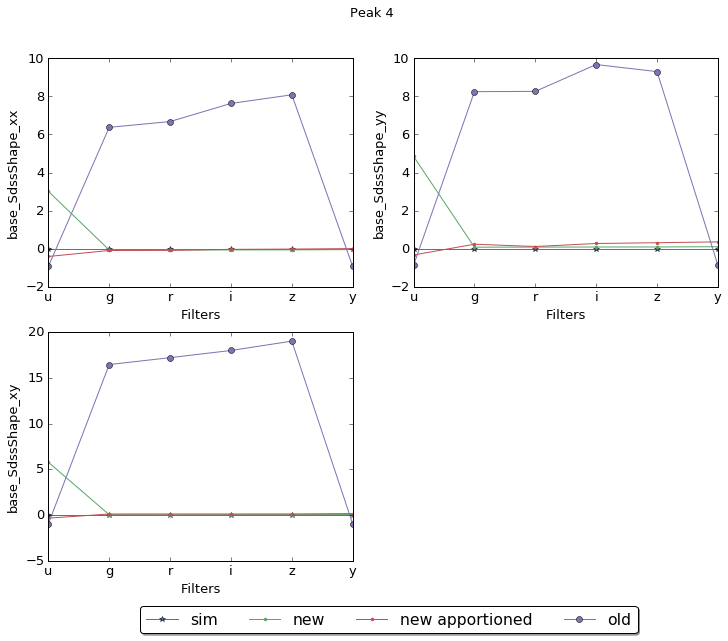

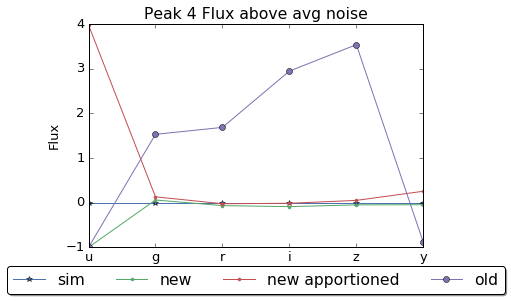

INFO:lsst.meas.deblender.proximal:Peak 5


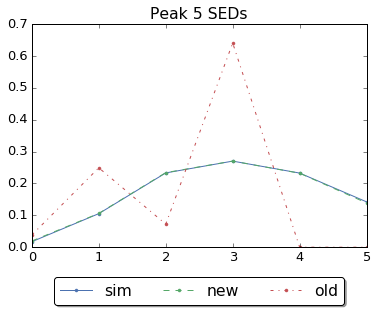

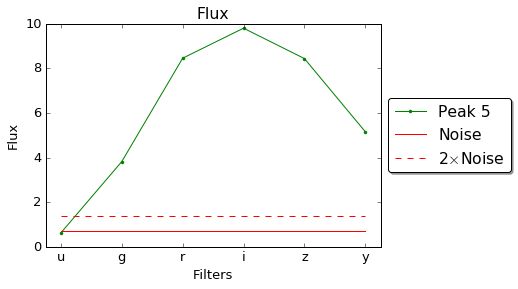

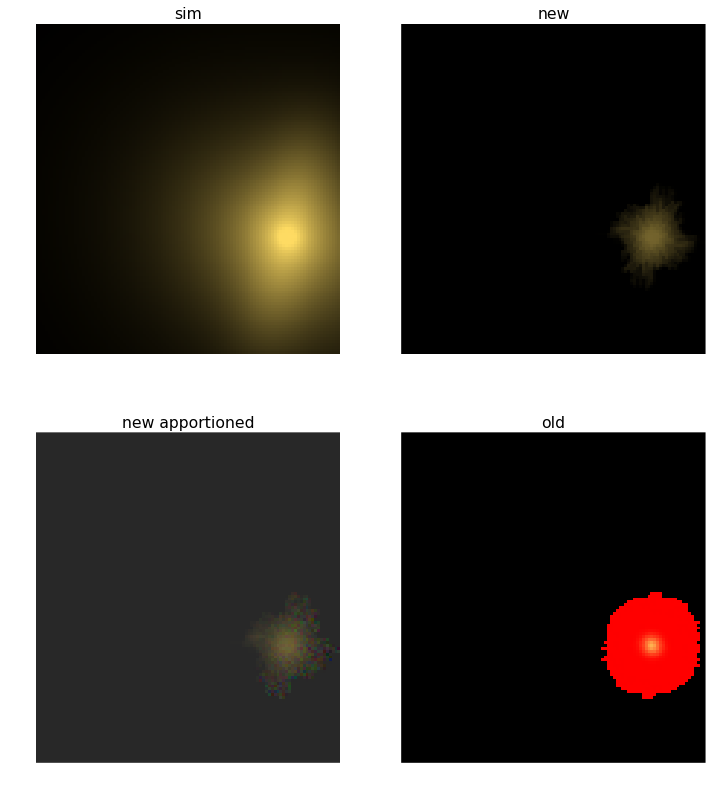

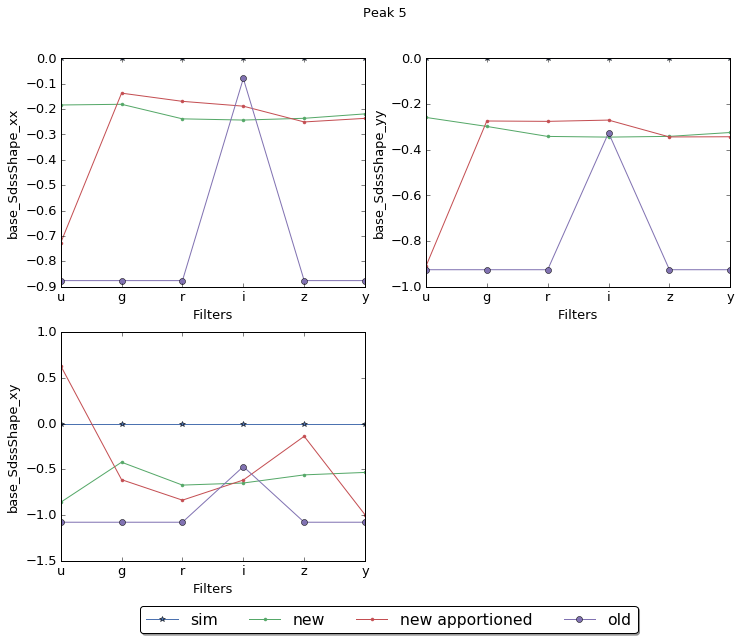

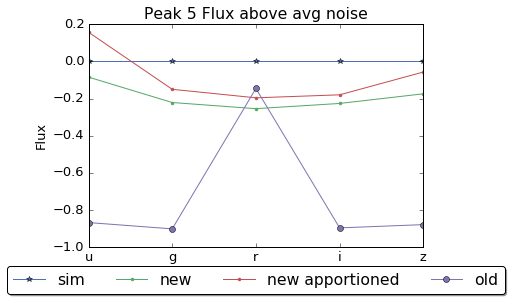

INFO:lsst.meas.deblender.proximal:Peak 6


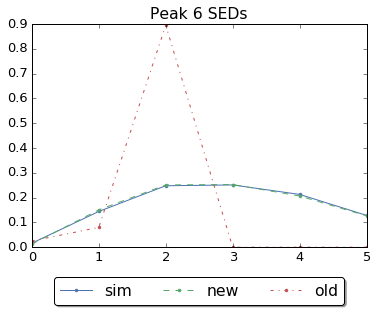

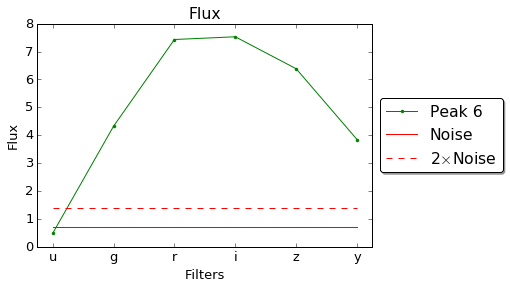

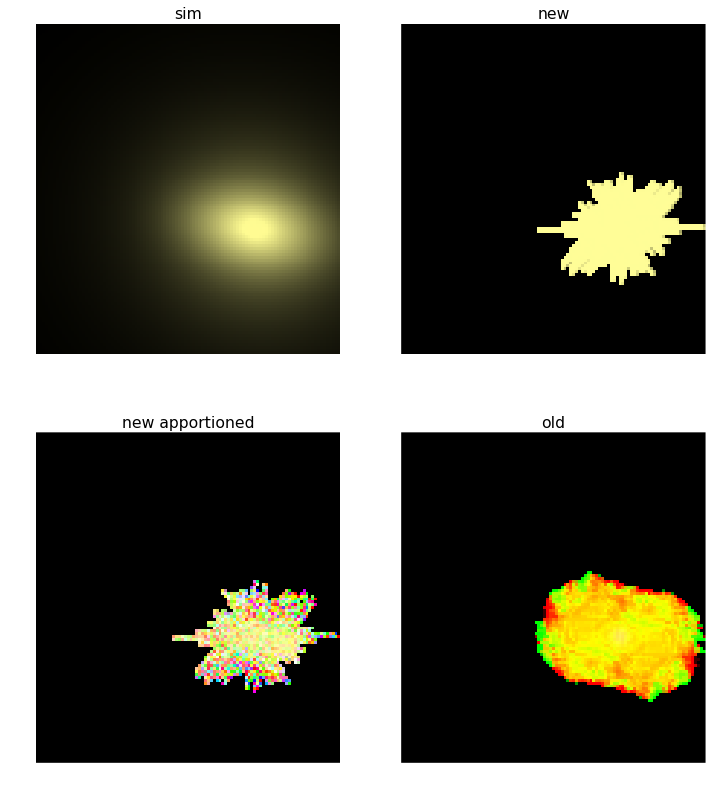

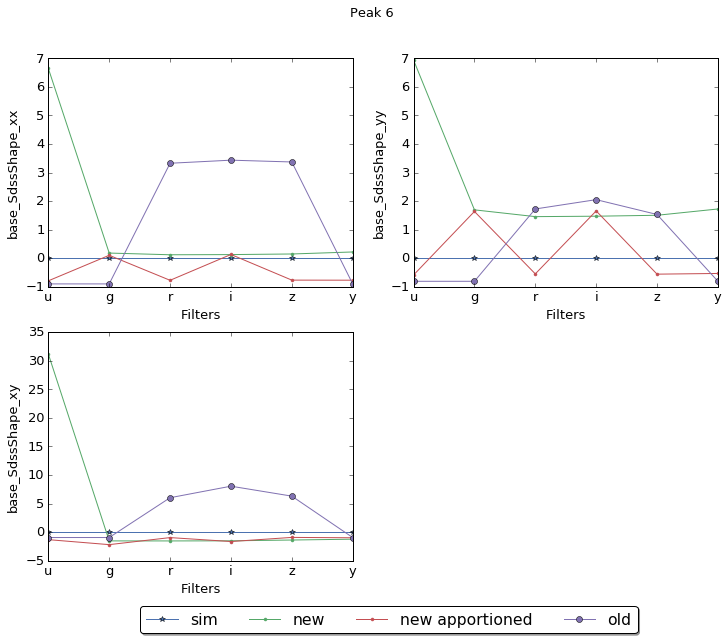

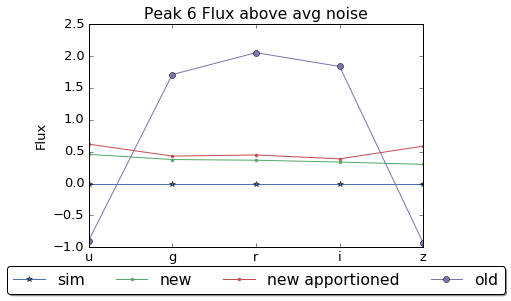

INFO:lsst.meas.deblender.proximal:Peak 7


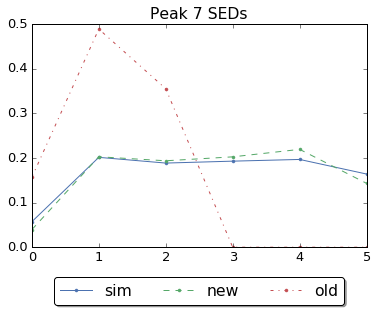

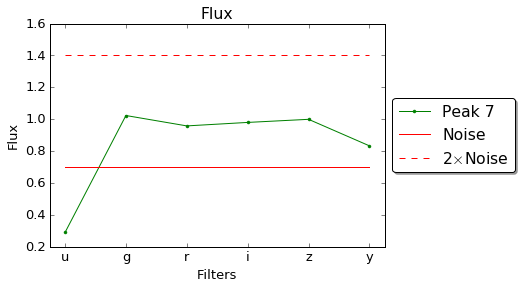

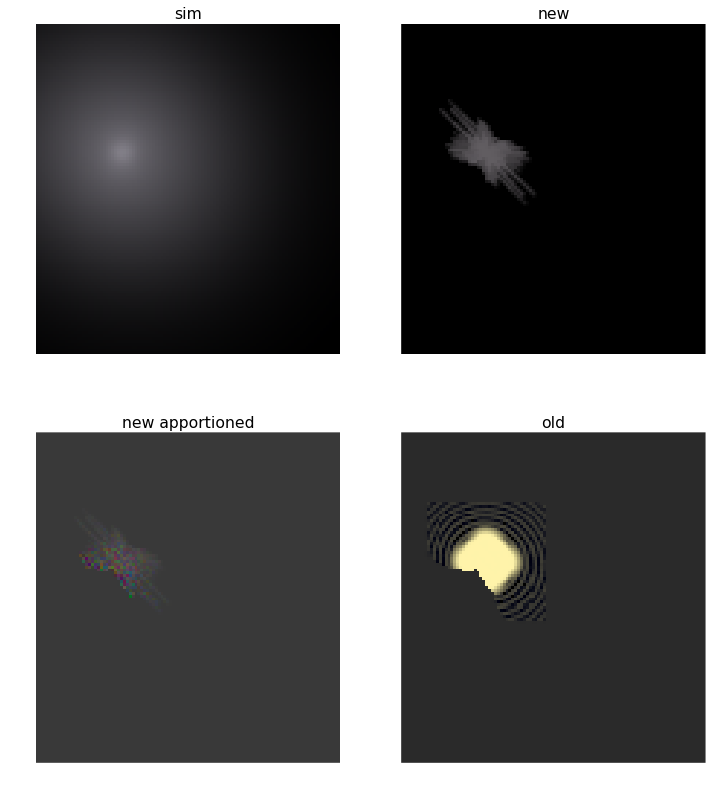

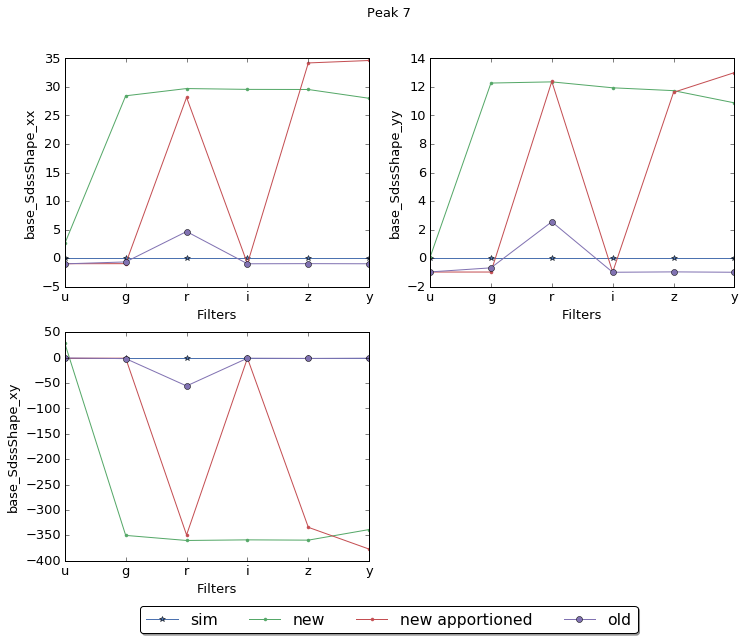

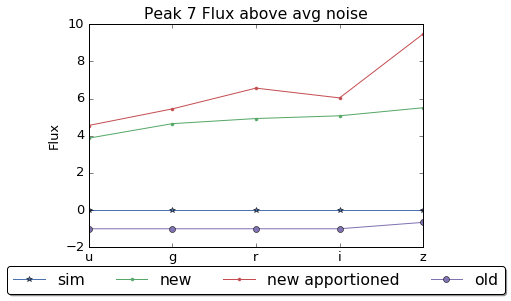

INFO:lsst.meas.deblender.proximal:No flux in peak 8
INFO:lsst.meas.deblender.proximal:No flux in peak 9
INFO:lsst.meas.deblender.proximal:Parent id: 7
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 7.11 s


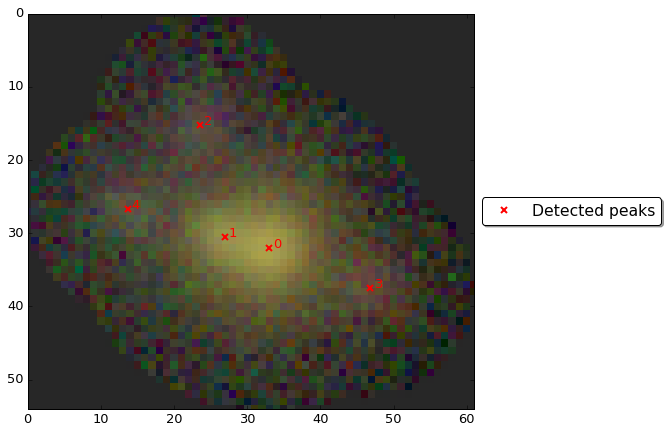

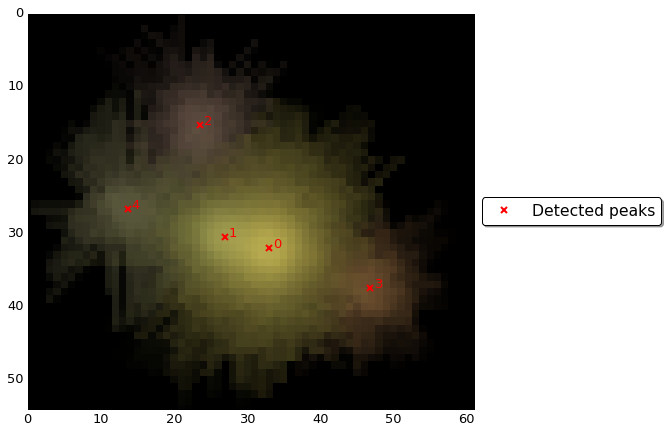

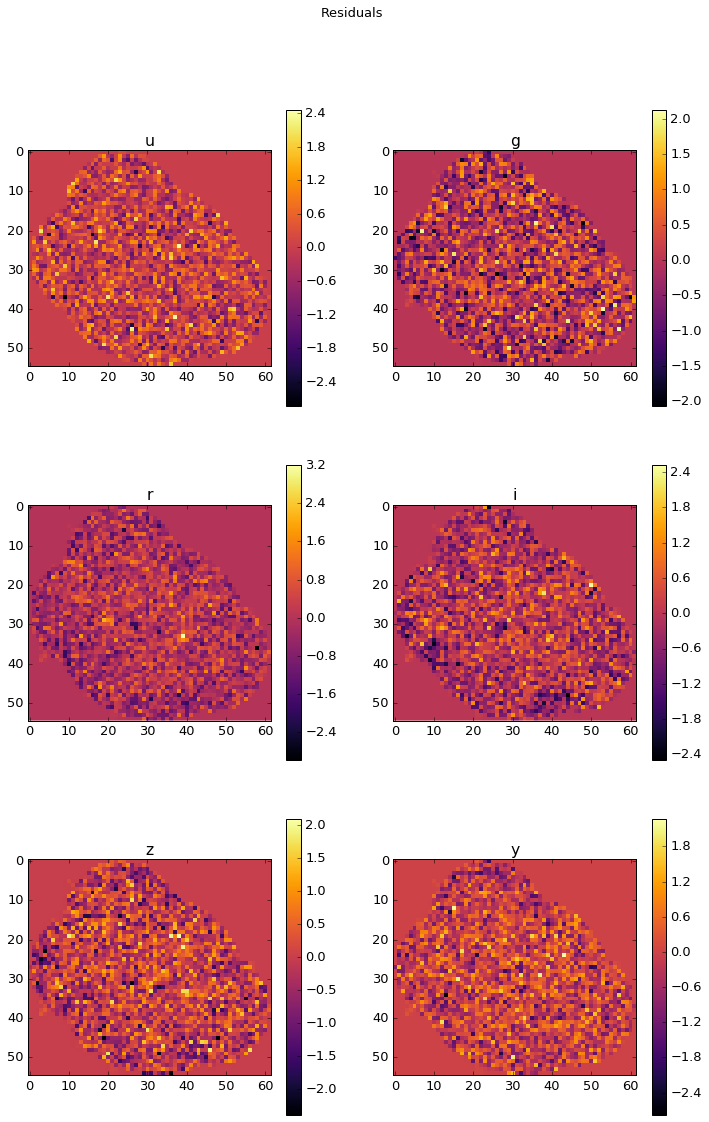

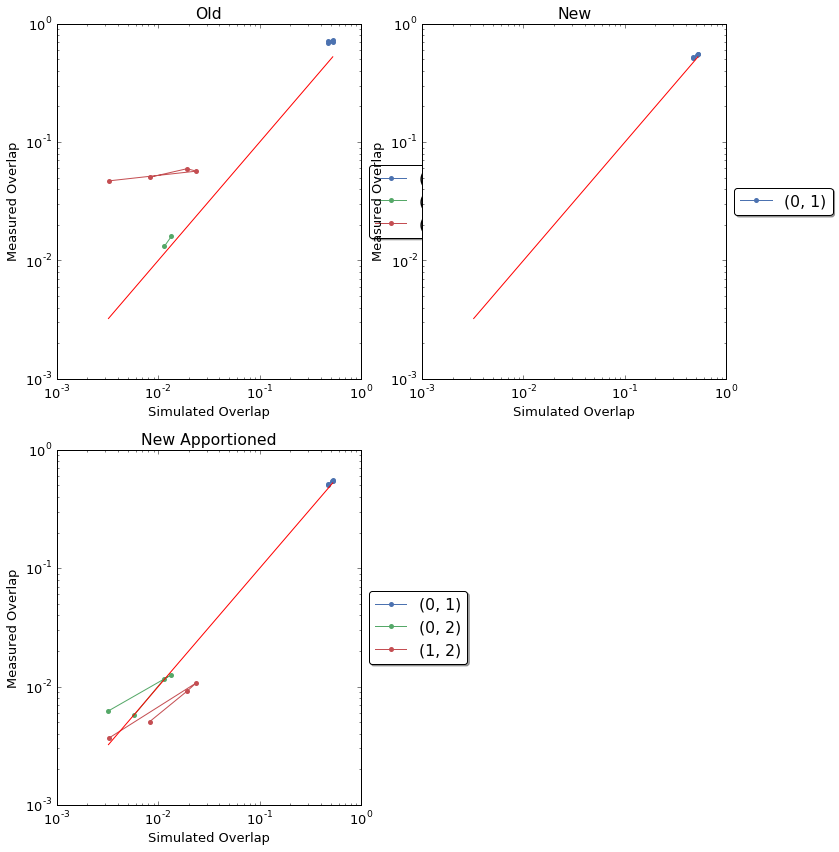

INFO:lsst.meas.deblender.proximal:Peak 0


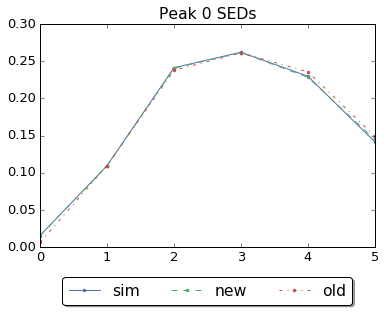

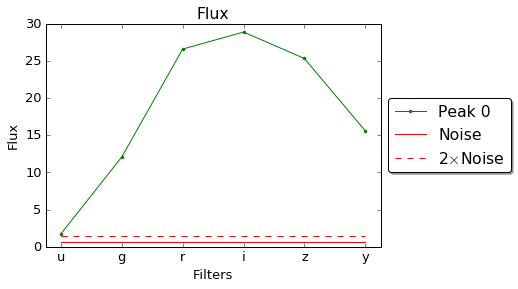

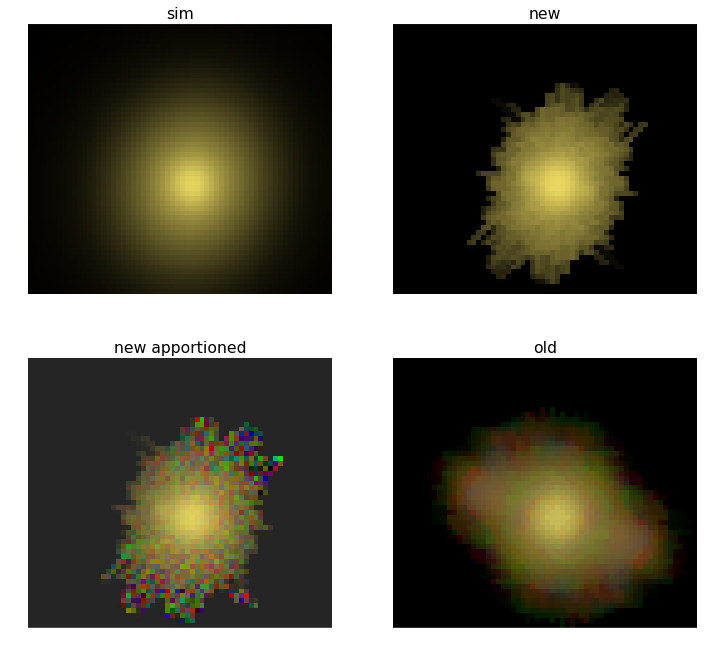

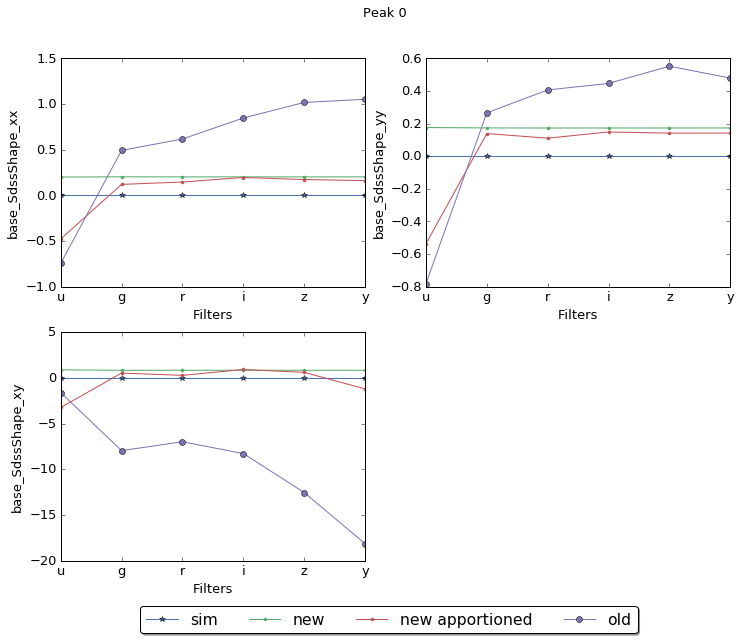

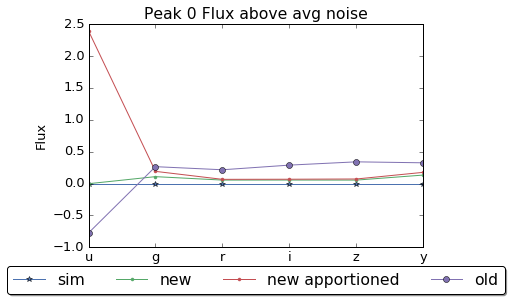

INFO:lsst.meas.deblender.proximal:Peak 1


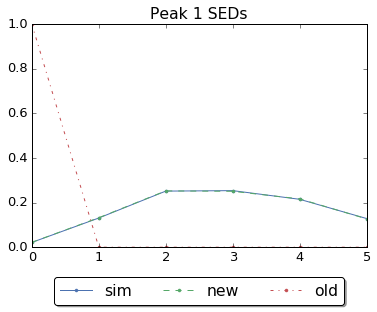

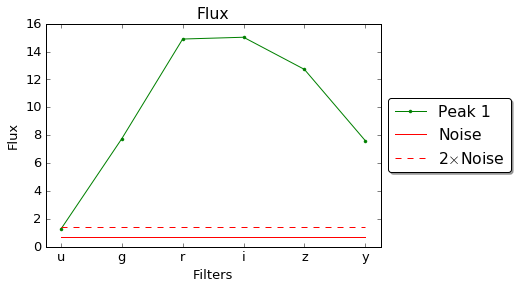

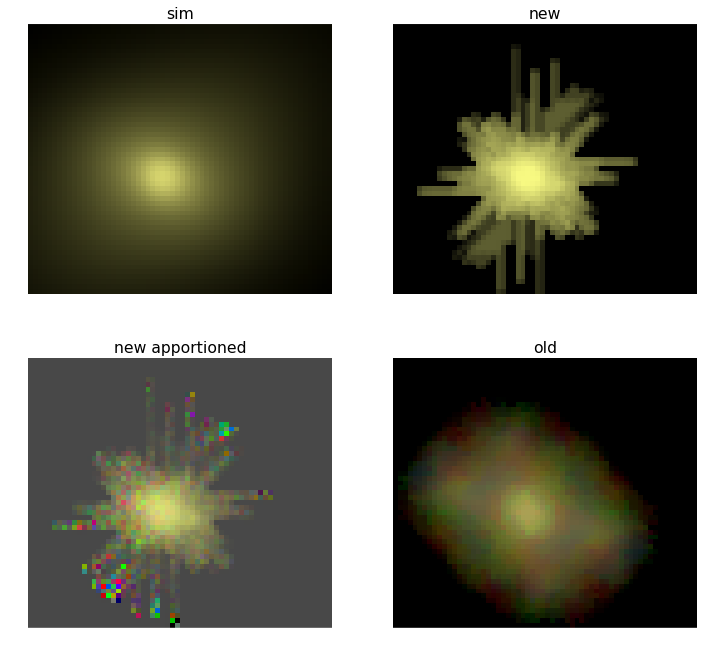

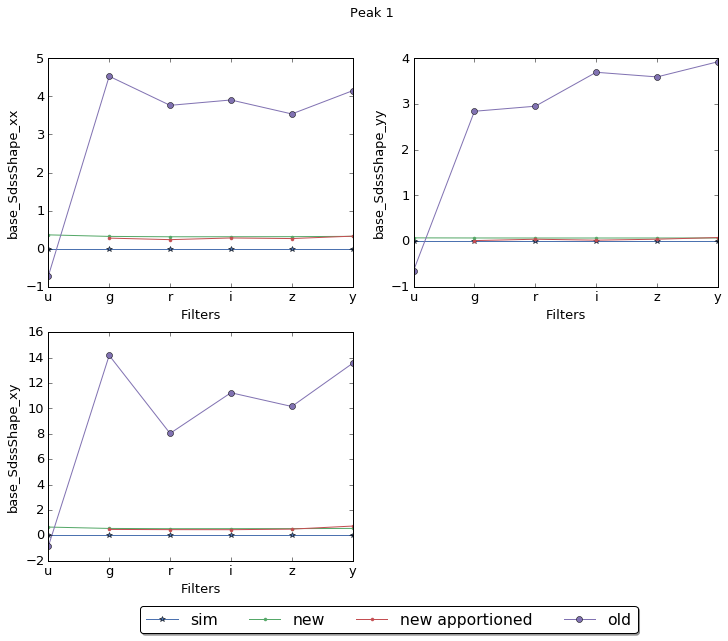

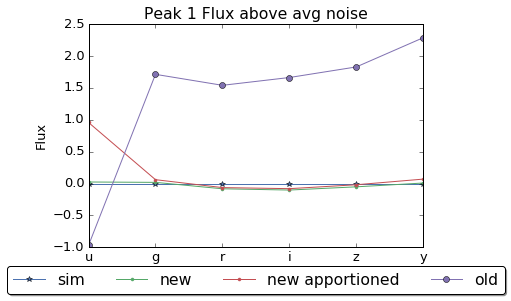

INFO:lsst.meas.deblender.proximal:Peak 2


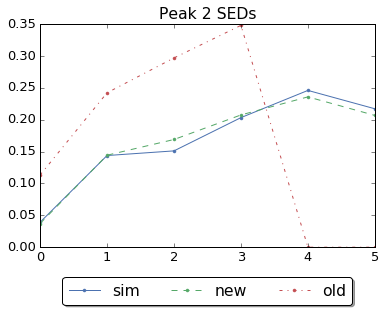

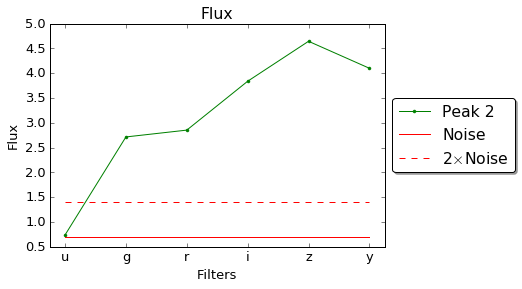

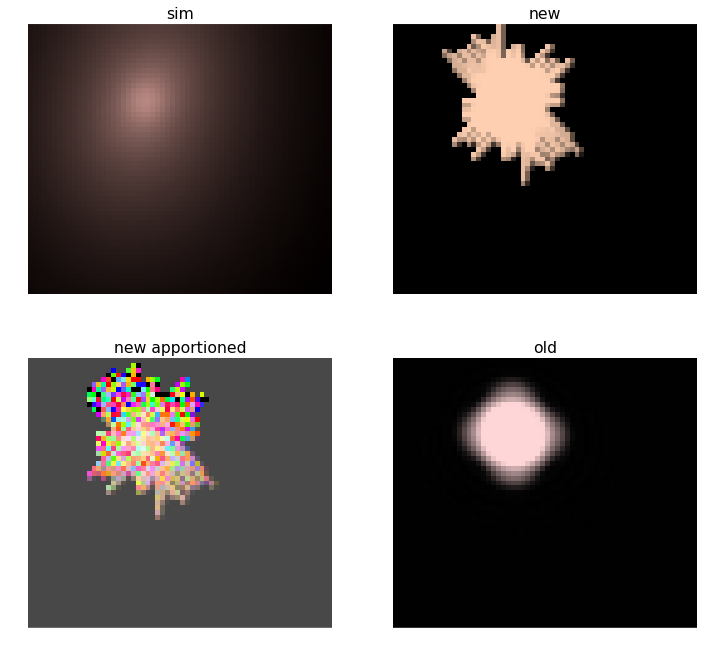

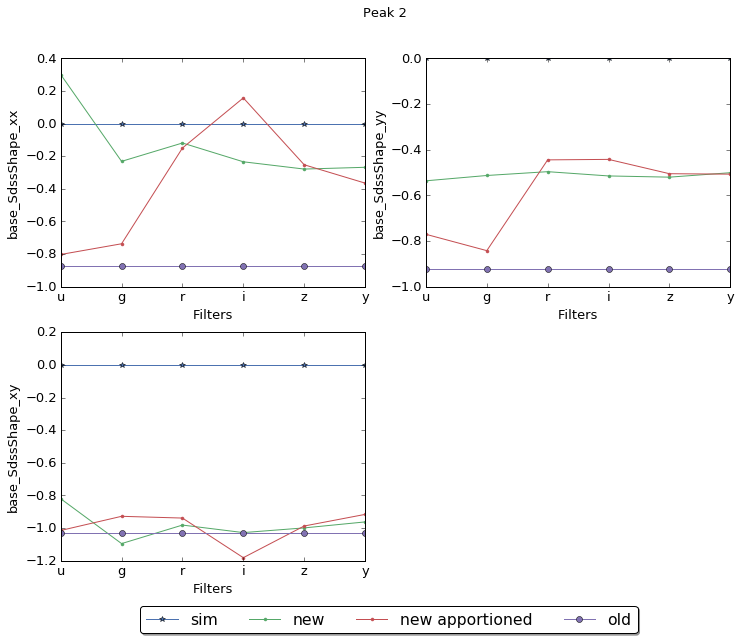

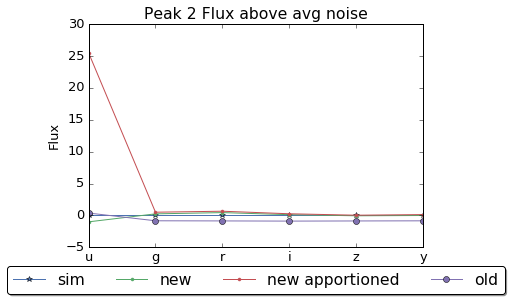

INFO:lsst.meas.deblender.proximal:Peak 3


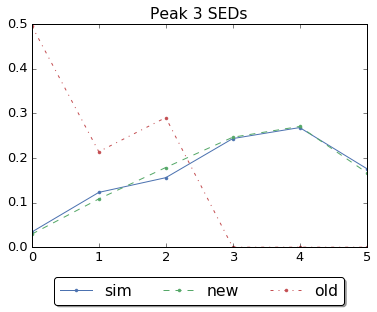

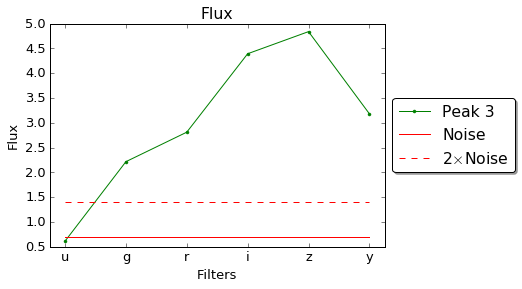

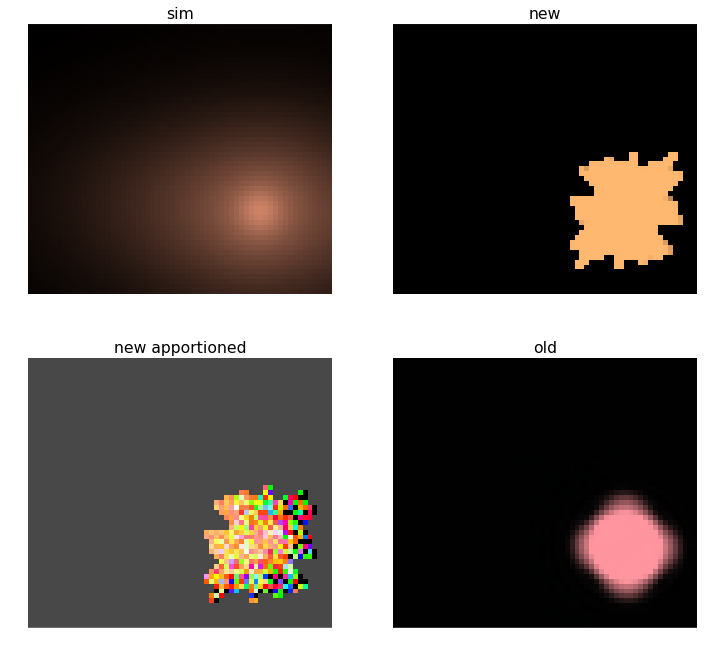

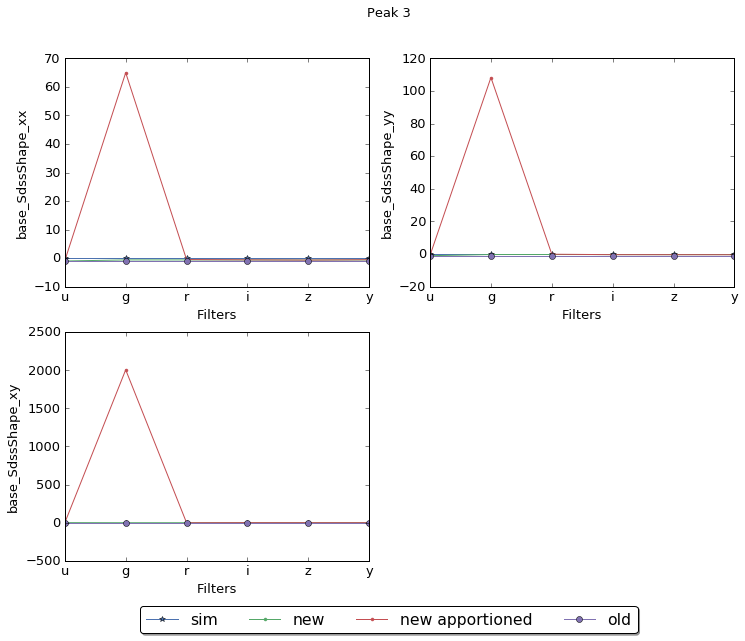

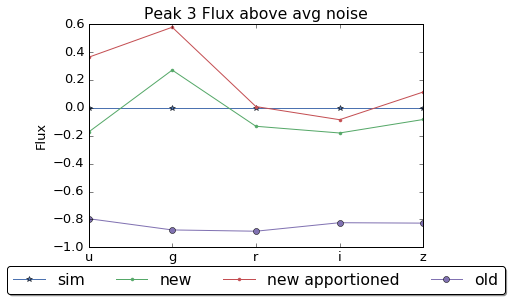

INFO:lsst.meas.deblender.proximal:Peak 4


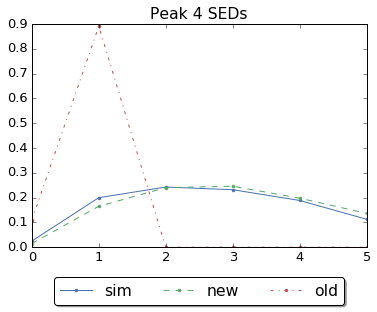

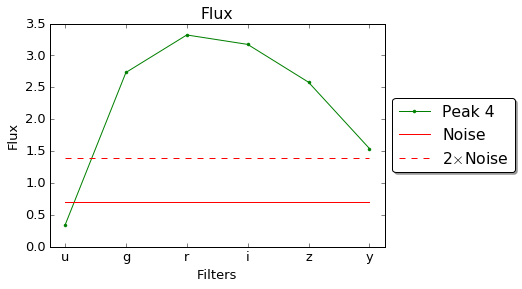

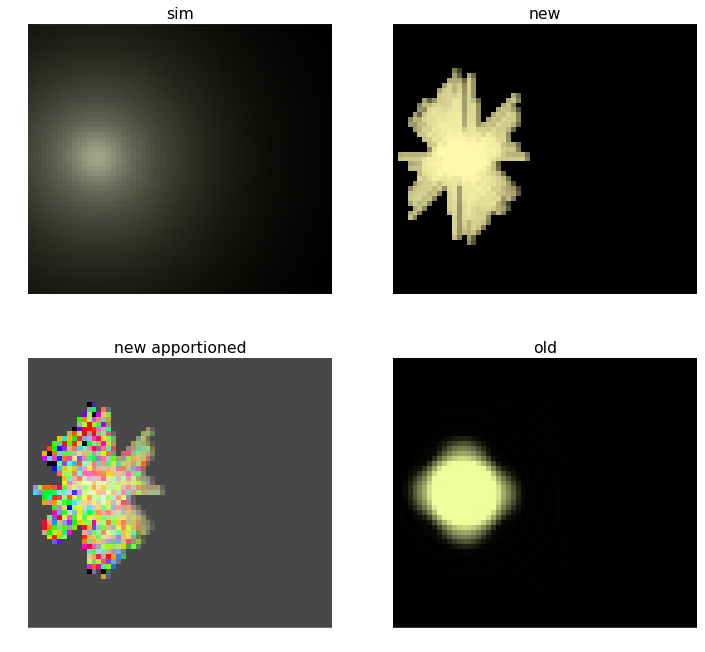

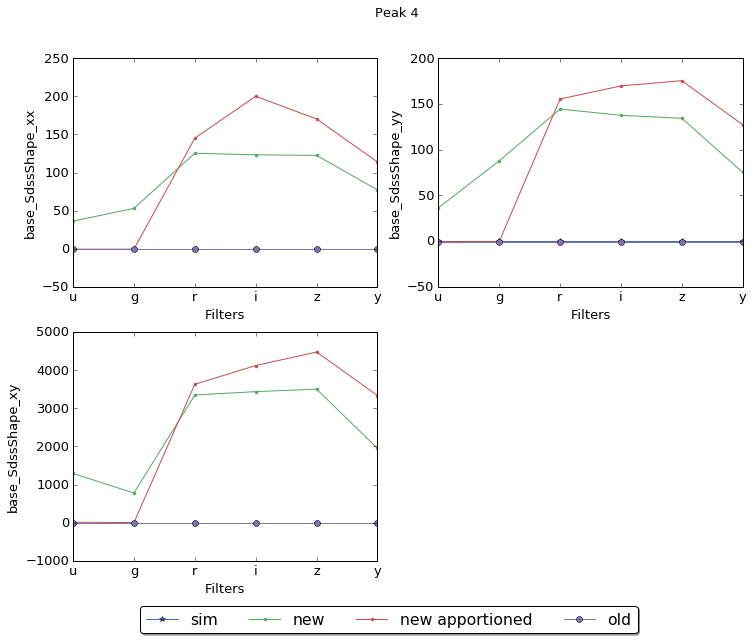

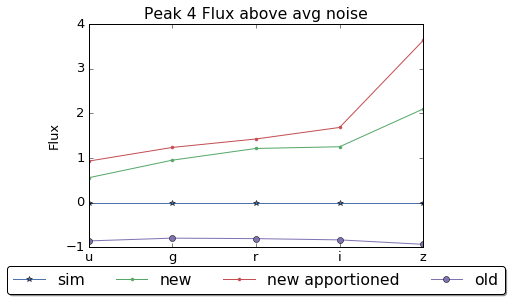

INFO:lsst.meas.deblender.proximal:Parent id: 10
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.71 s


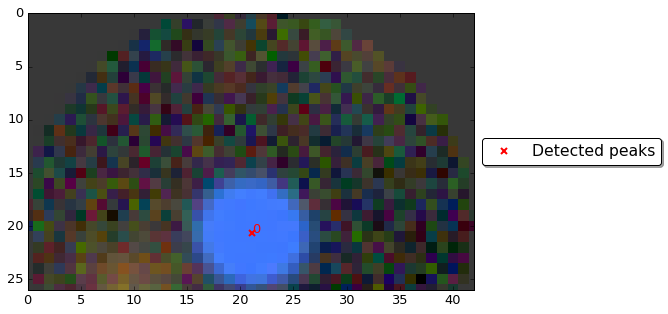

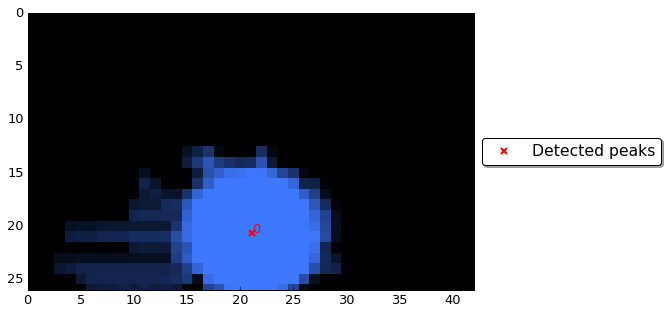

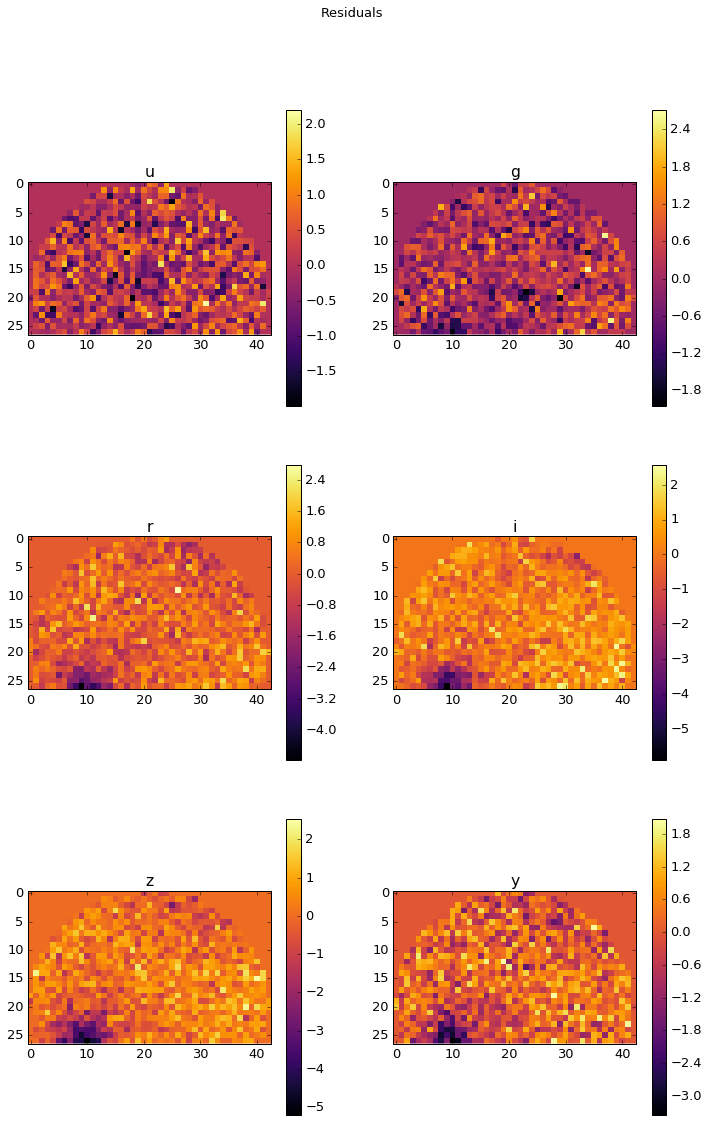

INFO:lsst.meas.deblender.proximal:Peak 0


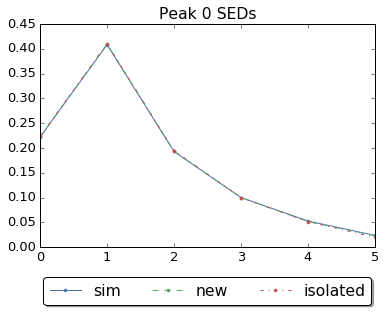

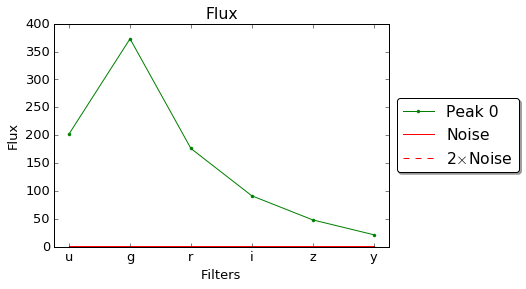

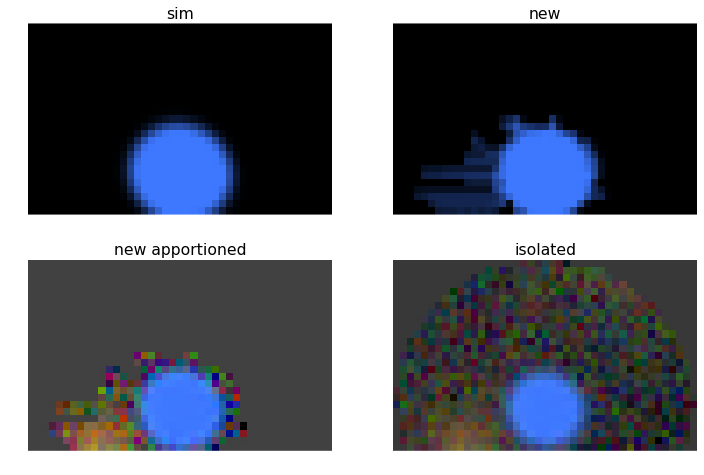

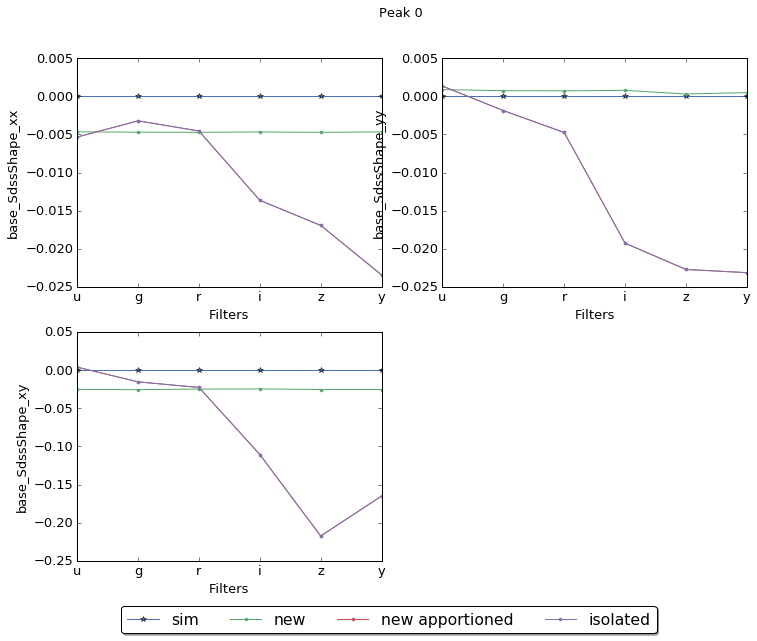

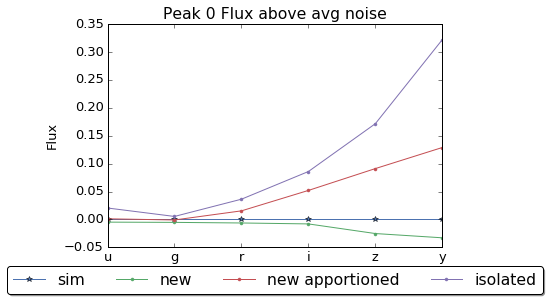

INFO:lsst.meas.deblender.proximal:Parent id: 11
INFO:proxmin.algorithms:Completed 1000 iterations
INFO:lsst.meas.deblender.proximal:Total Runtime: 1.63 s


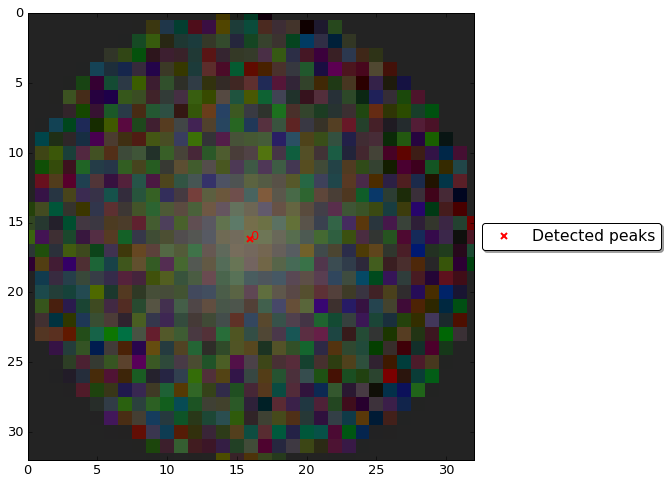

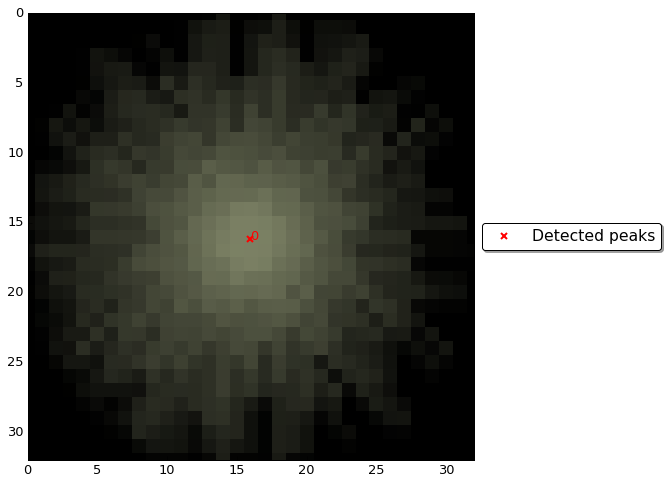

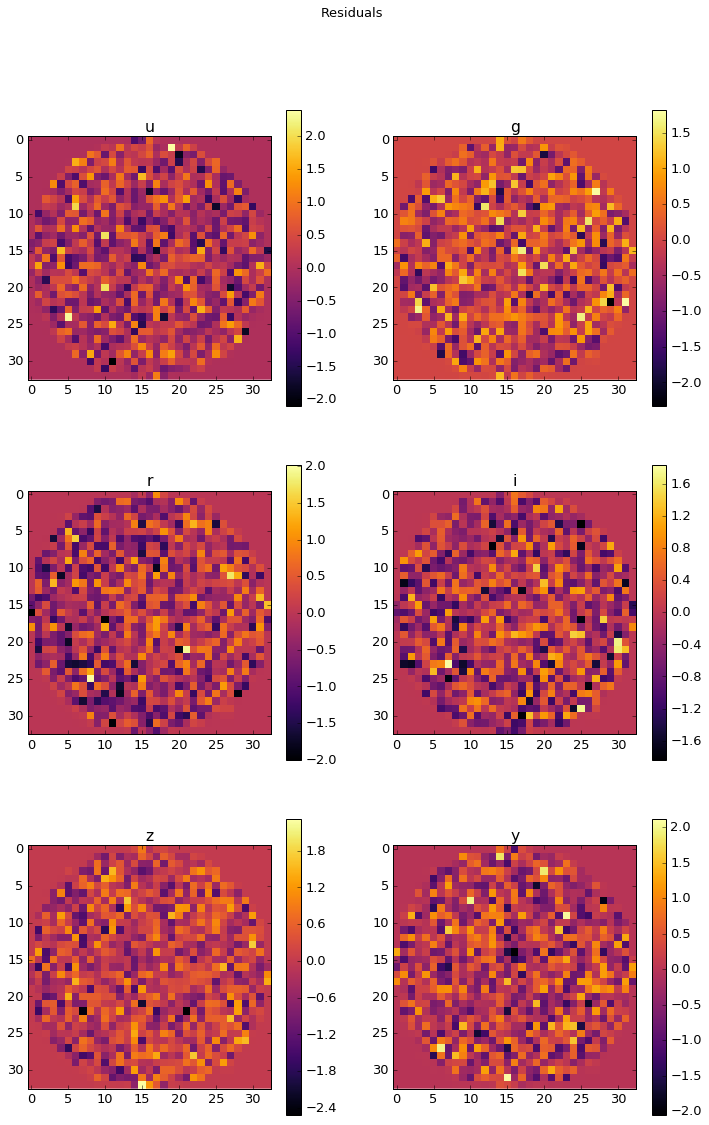

INFO:lsst.meas.deblender.proximal:Peak 0


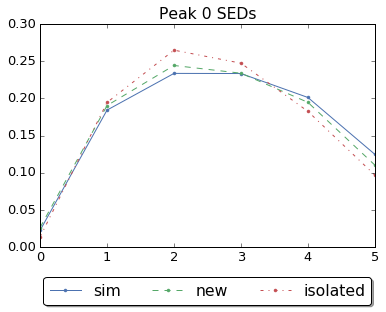

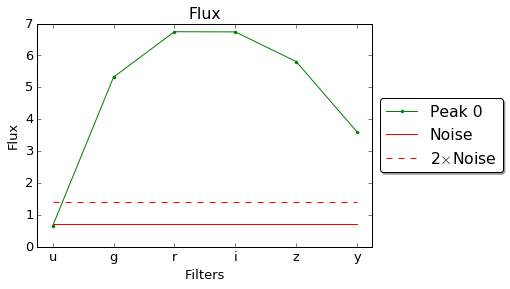

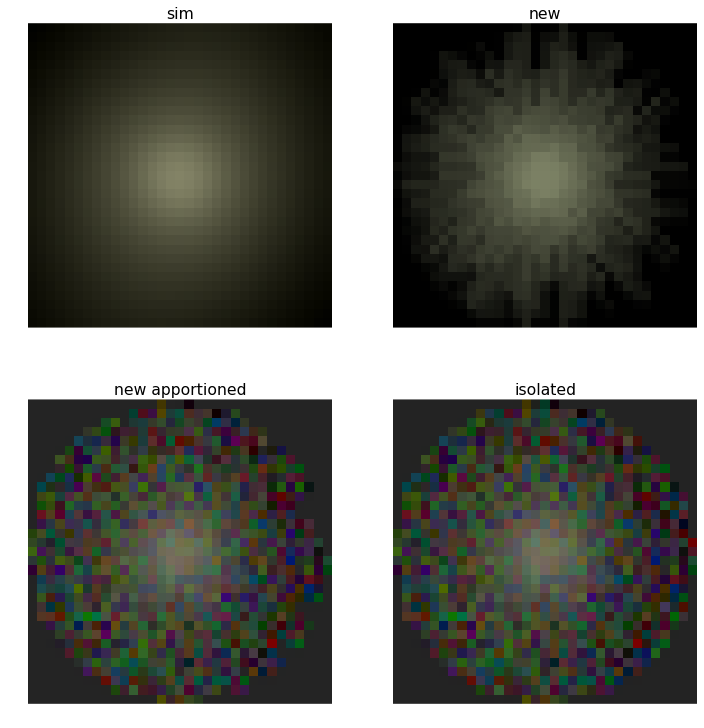

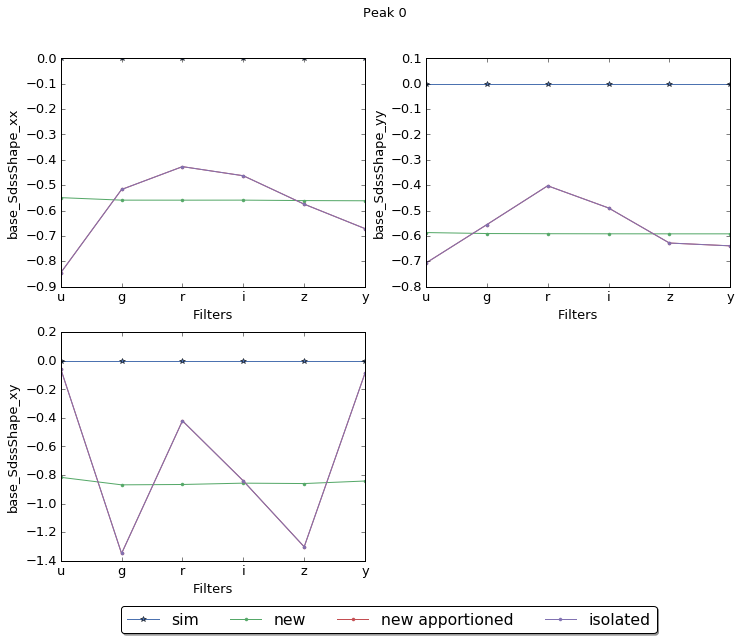

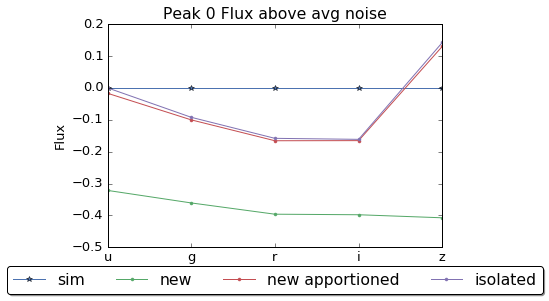

In [4]:
expDb.deblend(
    display=False,
    maxiter=1000,
    strict_constraints="M",
    constraints="S",
    usePsf=False,
    e_rel=1e-2,
    monotonicUseNearest=True,
    algorithm="GLMM",
    deblendName="new",
    compare=True,
    l0_thresh=.35,
)

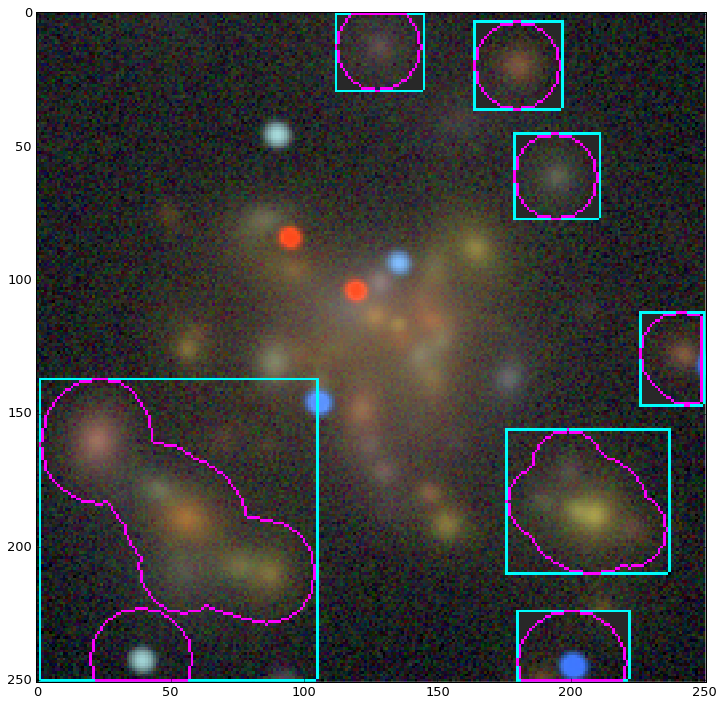

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
display.plotColorImage(calexps=expDb.calexps, figsize=(12,12), ax=ax, show=False)
for pid, parentDeblend in expDb.deblends["new"].items():
    fp = parentDeblend.footprint
    
    bbox = fp.getBBox()
    xmin = bbox.getMinX()
    ymin = bbox.getMinY()
    xmax = bbox.getMaxX()
    ymax = bbox.getMaxY()
    border = np.zeros((251,251))
    border[ymin,xmin:xmax] = 1
    border[ymin:ymax,xmin] = 1
    border[ymax,xmin:xmax] = 1
    border[ymin:ymax,xmax] = 1
    border = np.ma.array(border, mask=border==0)
    ax.imshow(border, cmap="cool")
    
    border, filled = debUtils.getFootprintArray(fp, expDb.calexps[0].getBBox())
    ax.imshow(border, cmap="cool_r")